In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [206]:
data_test = pd.read_excel(r'C:\Users\Manuel Revelo\Desktop\PI2_DATATHON_DATA03\PROYECTO DATATHON\datathon\Datathon-cohorte3\E-Commerce_test.xlsx')

In [207]:
data_train = pd.read_excel(r'C:\Users\Manuel Revelo\Desktop\PI2_DATATHON_DATA03\PROYECTO DATATHON\datathon\Datathon-cohorte3\E-Commerce_train.xlsx')

In [208]:
data_test.shape

(2000, 11)

In [209]:
data_train.shape

(8999, 12)

In [210]:
data_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [211]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2000 non-null   int64 
 1   Warehouse_block      2000 non-null   object
 2   Mode_of_Shipment     2000 non-null   object
 3   Customer_care_calls  2000 non-null   int64 
 4   Customer_rating      2000 non-null   int64 
 5   Cost_of_the_Product  2000 non-null   int64 
 6   Prior_purchases      2000 non-null   int64 
 7   Product_importance   2000 non-null   object
 8   Gender               2000 non-null   object
 9   Discount_offered     2000 non-null   int64 
 10  Weight_in_gms        2000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 172.0+ KB


In [212]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [213]:
data_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [214]:
print('La cantidad de registros duplicados en train es:', data_train.duplicated().sum())
print('La cantidad de registros duplicados en test es:', data_test.duplicated().sum())

La cantidad de registros duplicados en train es: 0
La cantidad de registros duplicados en test es: 0


valores atipicos

In [215]:
data_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [216]:
data_train2 = data_train 

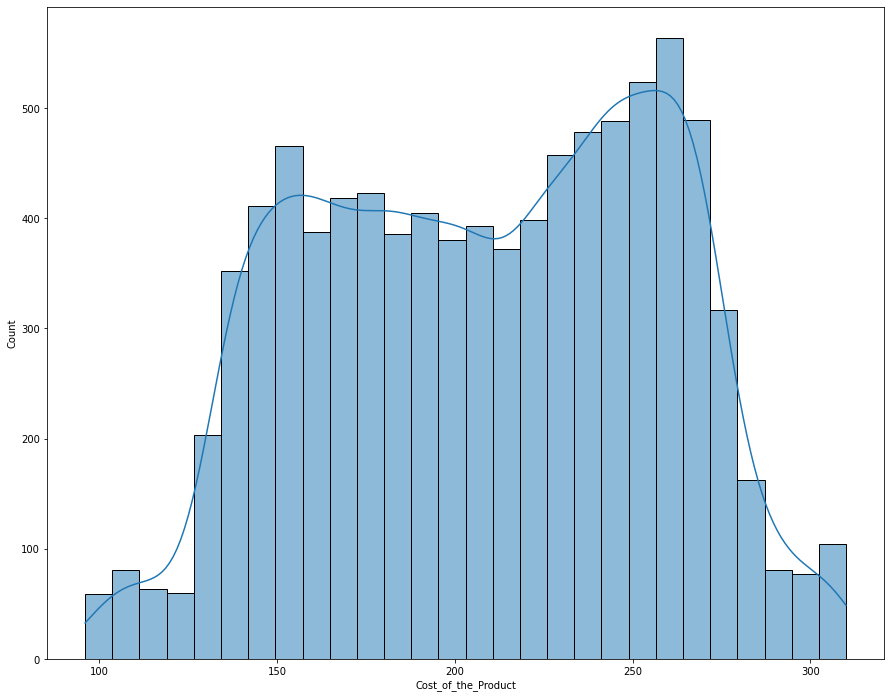

In [217]:
sns.histplot(x = 'Cost_of_the_Product', data= data_train2, kde = True)
plt.show()

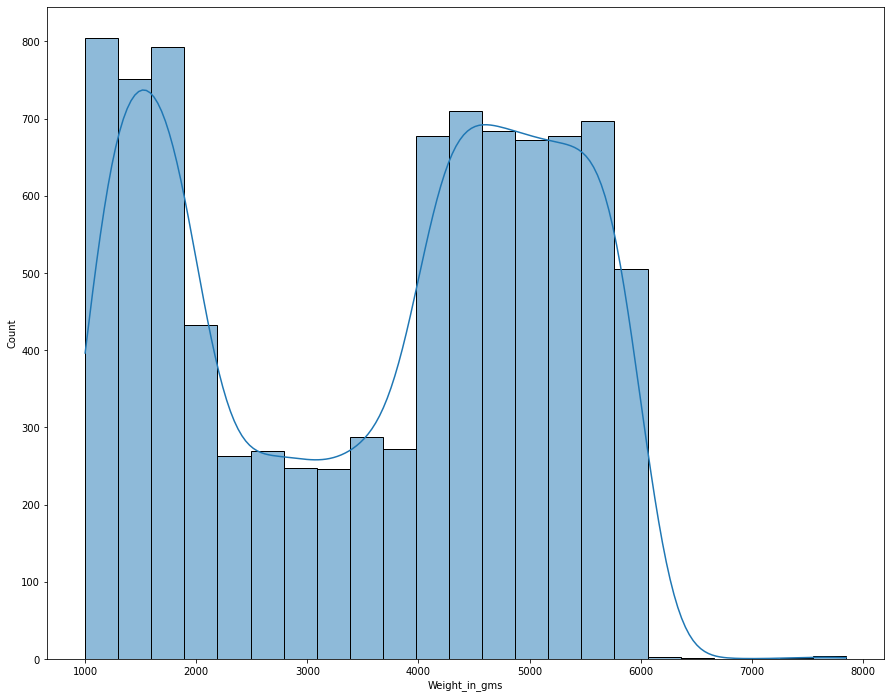

In [218]:
sns.histplot(x = 'Weight_in_gms', data= data_train2, kde = True)
plt.show()

Total de entregas a tiempo

([<matplotlib.patches.Wedge at 0x1d4454f7130>,
 [Text(0.45428743828885293, 1.0018098239750655, '0'),
  Text(-0.454287532085056, -1.0018097814416014, '1')],
 [Text(0.24779314815755613, 0.5464417221682175, '36.45%'),
  Text(-0.24779319931912144, -0.5464416989681462, '63.55%')])

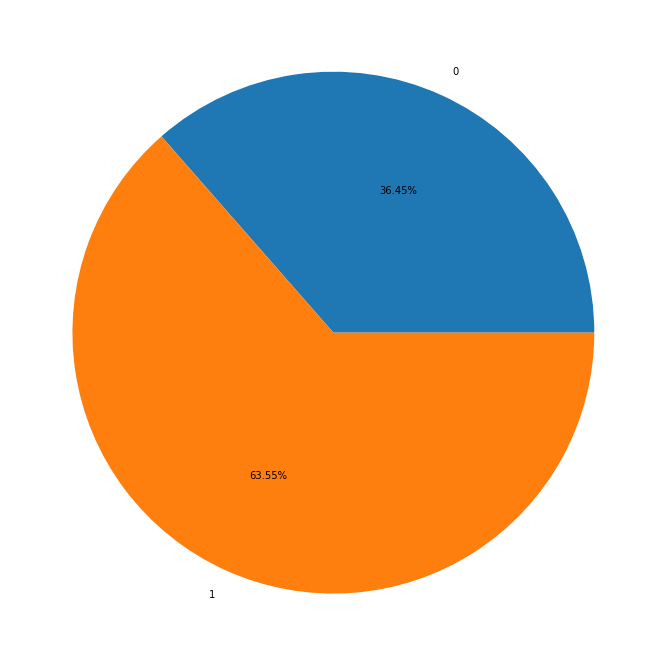

In [219]:
retraso=pd.DataFrame(data_train2.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(data_train2)).reset_index()
plt.pie(retraso['ID'],labels=retraso['Reached.on.Time_Y.N'],autopct='%1.2f%%')

36,5% de los envios no llega a tiempo

Text(0, 0.5, 'porcentaje')

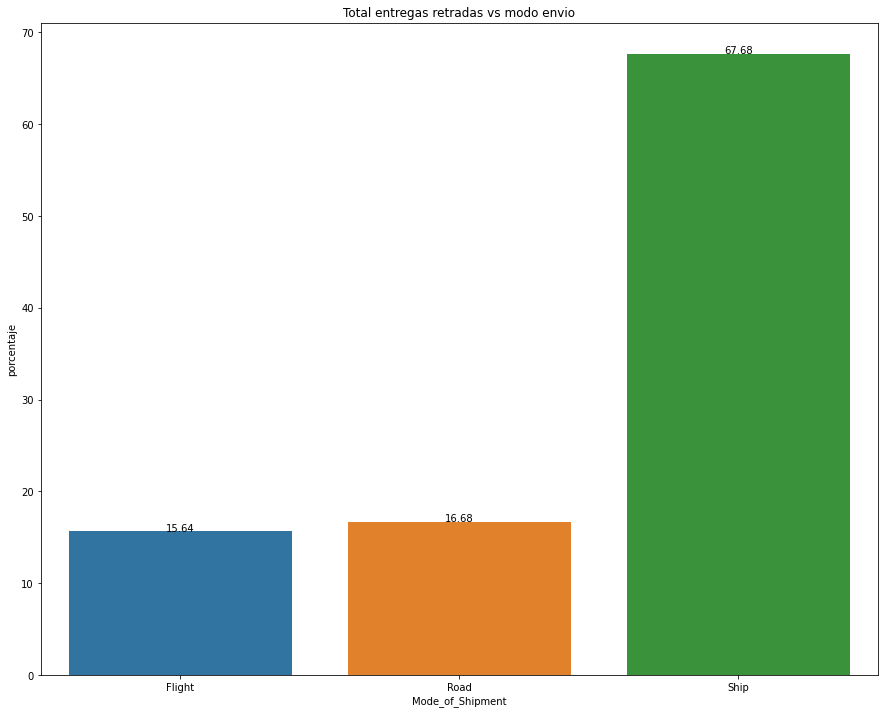

In [220]:
data1 = data_train2[data_train2['Reached.on.Time_Y.N']==0]
data2=pd.DataFrame((data1.groupby(['Mode_of_Shipment'])['ID'].count())/len(data1)*100)
data2=data2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=data2 )
for index, row in data2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total entregas retradas vs modo envio')
plt.ylabel('porcentaje')

Las entrega por barco son las que representan el mayor porcentaje de retrasos con 67.7%

Text(0, 0.5, 'porcentaje')

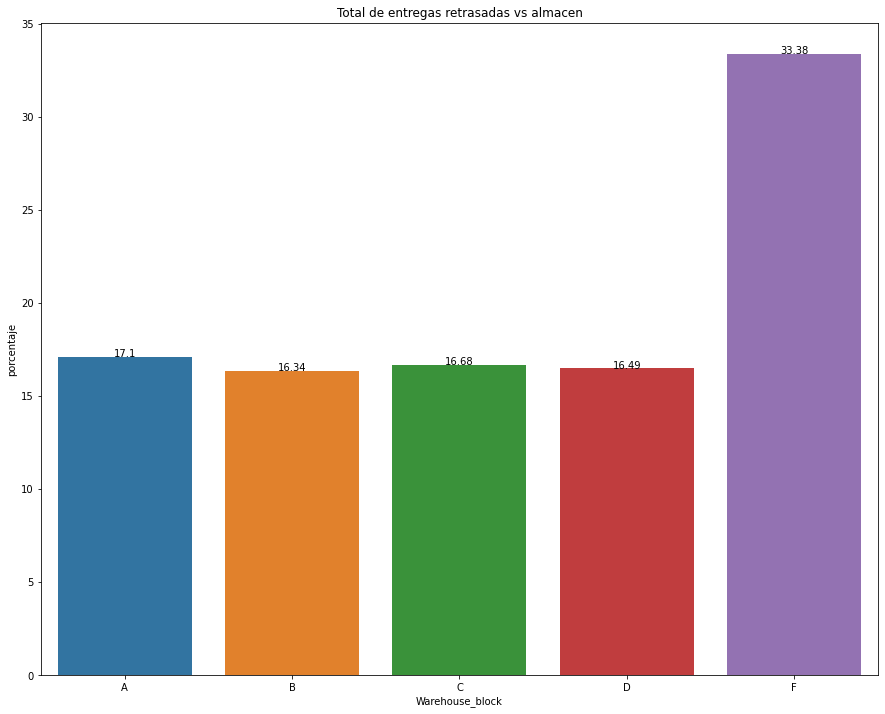

In [221]:
data3=pd.DataFrame((data1.groupby(['Warehouse_block'])['ID'].count())/len(data1)*100)
data3=data3.reset_index()
visual=sns.barplot(x="Warehouse_block", y="ID", data=data3 )
for index, row in data3.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total de entregas retrasadas vs almacen')
plt.ylabel('porcentaje')

las entregas retrasadas desde el alamcen F son mayores

Text(0.5, 1.0, 'Almacen vs entrega a tiempo o no')

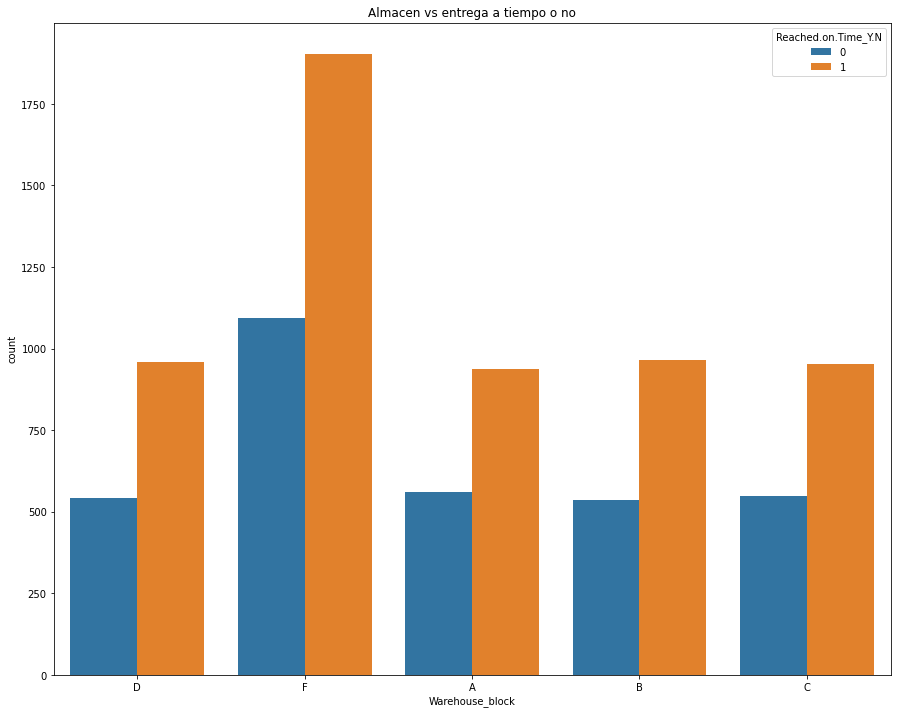

In [222]:
sns.countplot(x = "Warehouse_block", data = data_train2, hue="Reached.on.Time_Y.N")
plt.title("Almacen vs entrega a tiempo o no")

el almacen 4(F) es el q mas entregas retrasadas presenta

Text(0, 0.5, 'porcentaje')

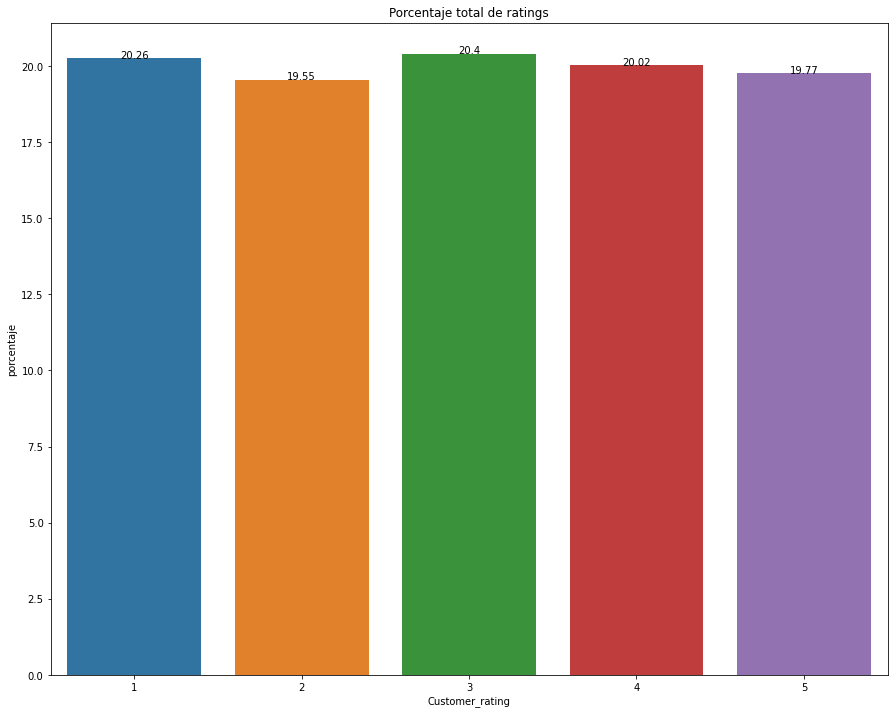

In [223]:
data4=pd.DataFrame((data_train2.groupby(['Customer_rating'])['ID'].count())/len(data_train2)*100)
data4=data4.reset_index()
visual=sns.barplot(x="Customer_rating", y="ID", data=data4 )
for index, row in data4.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Porcentaje total de ratings')
plt.ylabel('porcentaje')

es parejo el rating de calificaciones para envios

Text(0.5, 1.0, 'Importancia de producto por llegada a tiempo o No')

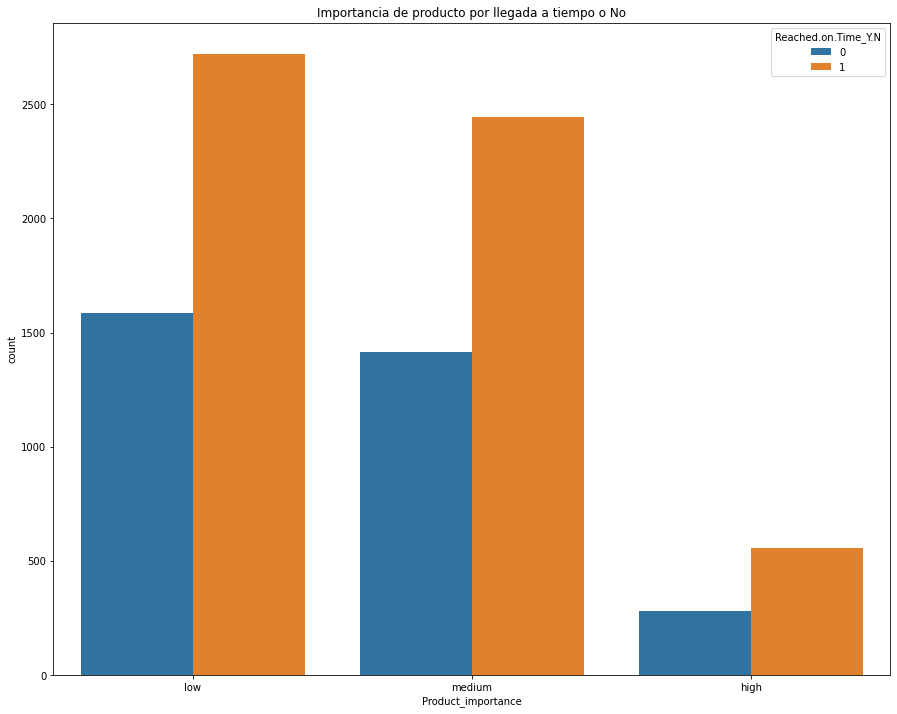

In [225]:
sns.countplot(x = "Product_importance", data = data_train2, hue="Reached.on.Time_Y.N")
plt.title("Importancia de producto por llegada a tiempo o No")

En baja importancia del producto hay mas entregas retrasadas. Pocos productos de gran importancia entregados. Los clientes están pidiendo más productos de baja importancia.

<AxesSubplot:>

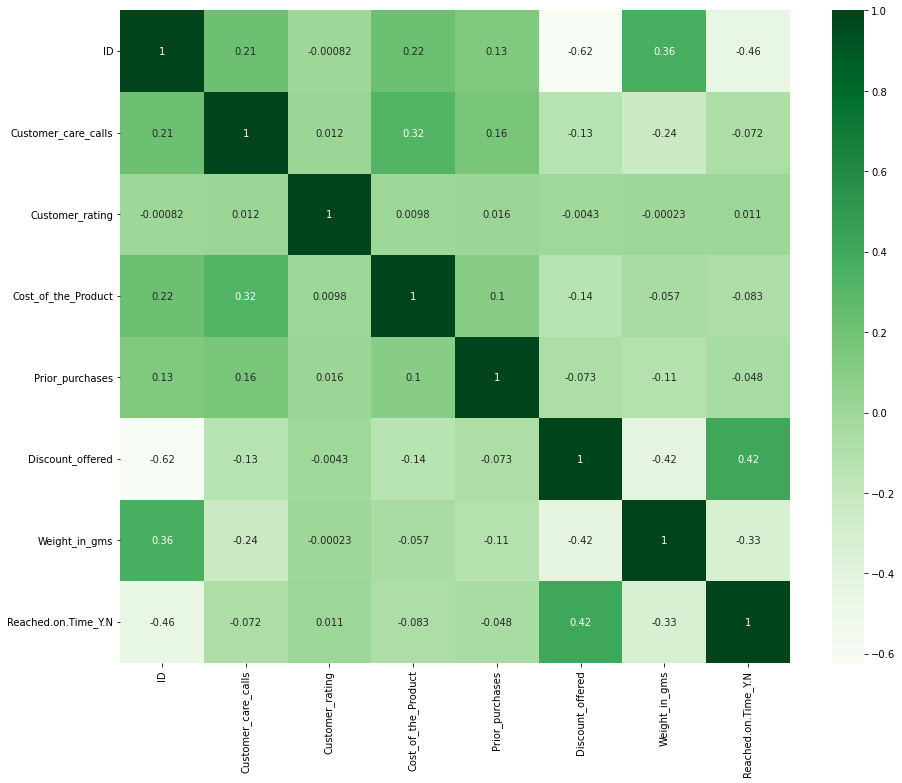

In [226]:
corr = data_train2.corr()
sns.heatmap(corr, cmap="Greens", annot=True)

El siguiente codigo nos permite identificar a qué distribución se ajustan mejor los datos con fitter. Esta librería permite ajustar cualquiera de las 80 distribuciones implementadas en scipy.Por lo que segun los resultados probaremos con reg logistica porque ademas es una variable discreta la que estamos buscando

In [227]:
from fitter import Fitter, get_common_distributions
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(data_train2['Reached.on.Time_Y.N'], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:01<00:00,  6.41it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,4030.272123,294.839611,-7192.293303,inf,0.612543,0.0
exponpow,4680.694692,364.051050,-5855.034031,inf,0.498582,0.0
chi2,4805.094398,165.042307,-5618.988905,inf,0.418915,0.0
powerlaw,5264.396516,23.448667,-4797.471733,inf,0.635515,0.0
expon,5286.981959,70.688785,-4768.051453,inf,0.428202,0.0
logistic,5308.667147,100.653205,-4731.216470,inf,0.370939,0.0
norm,5310.431751,85.429302,-4728.225693,inf,0.411085,0.0
gamma,5312.746344,86.325087,-4715.199395,inf,0.414065,0.0
cauchy,5367.286615,9397.455727,-4632.392158,inf,0.500000,0.0


In [228]:
data_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


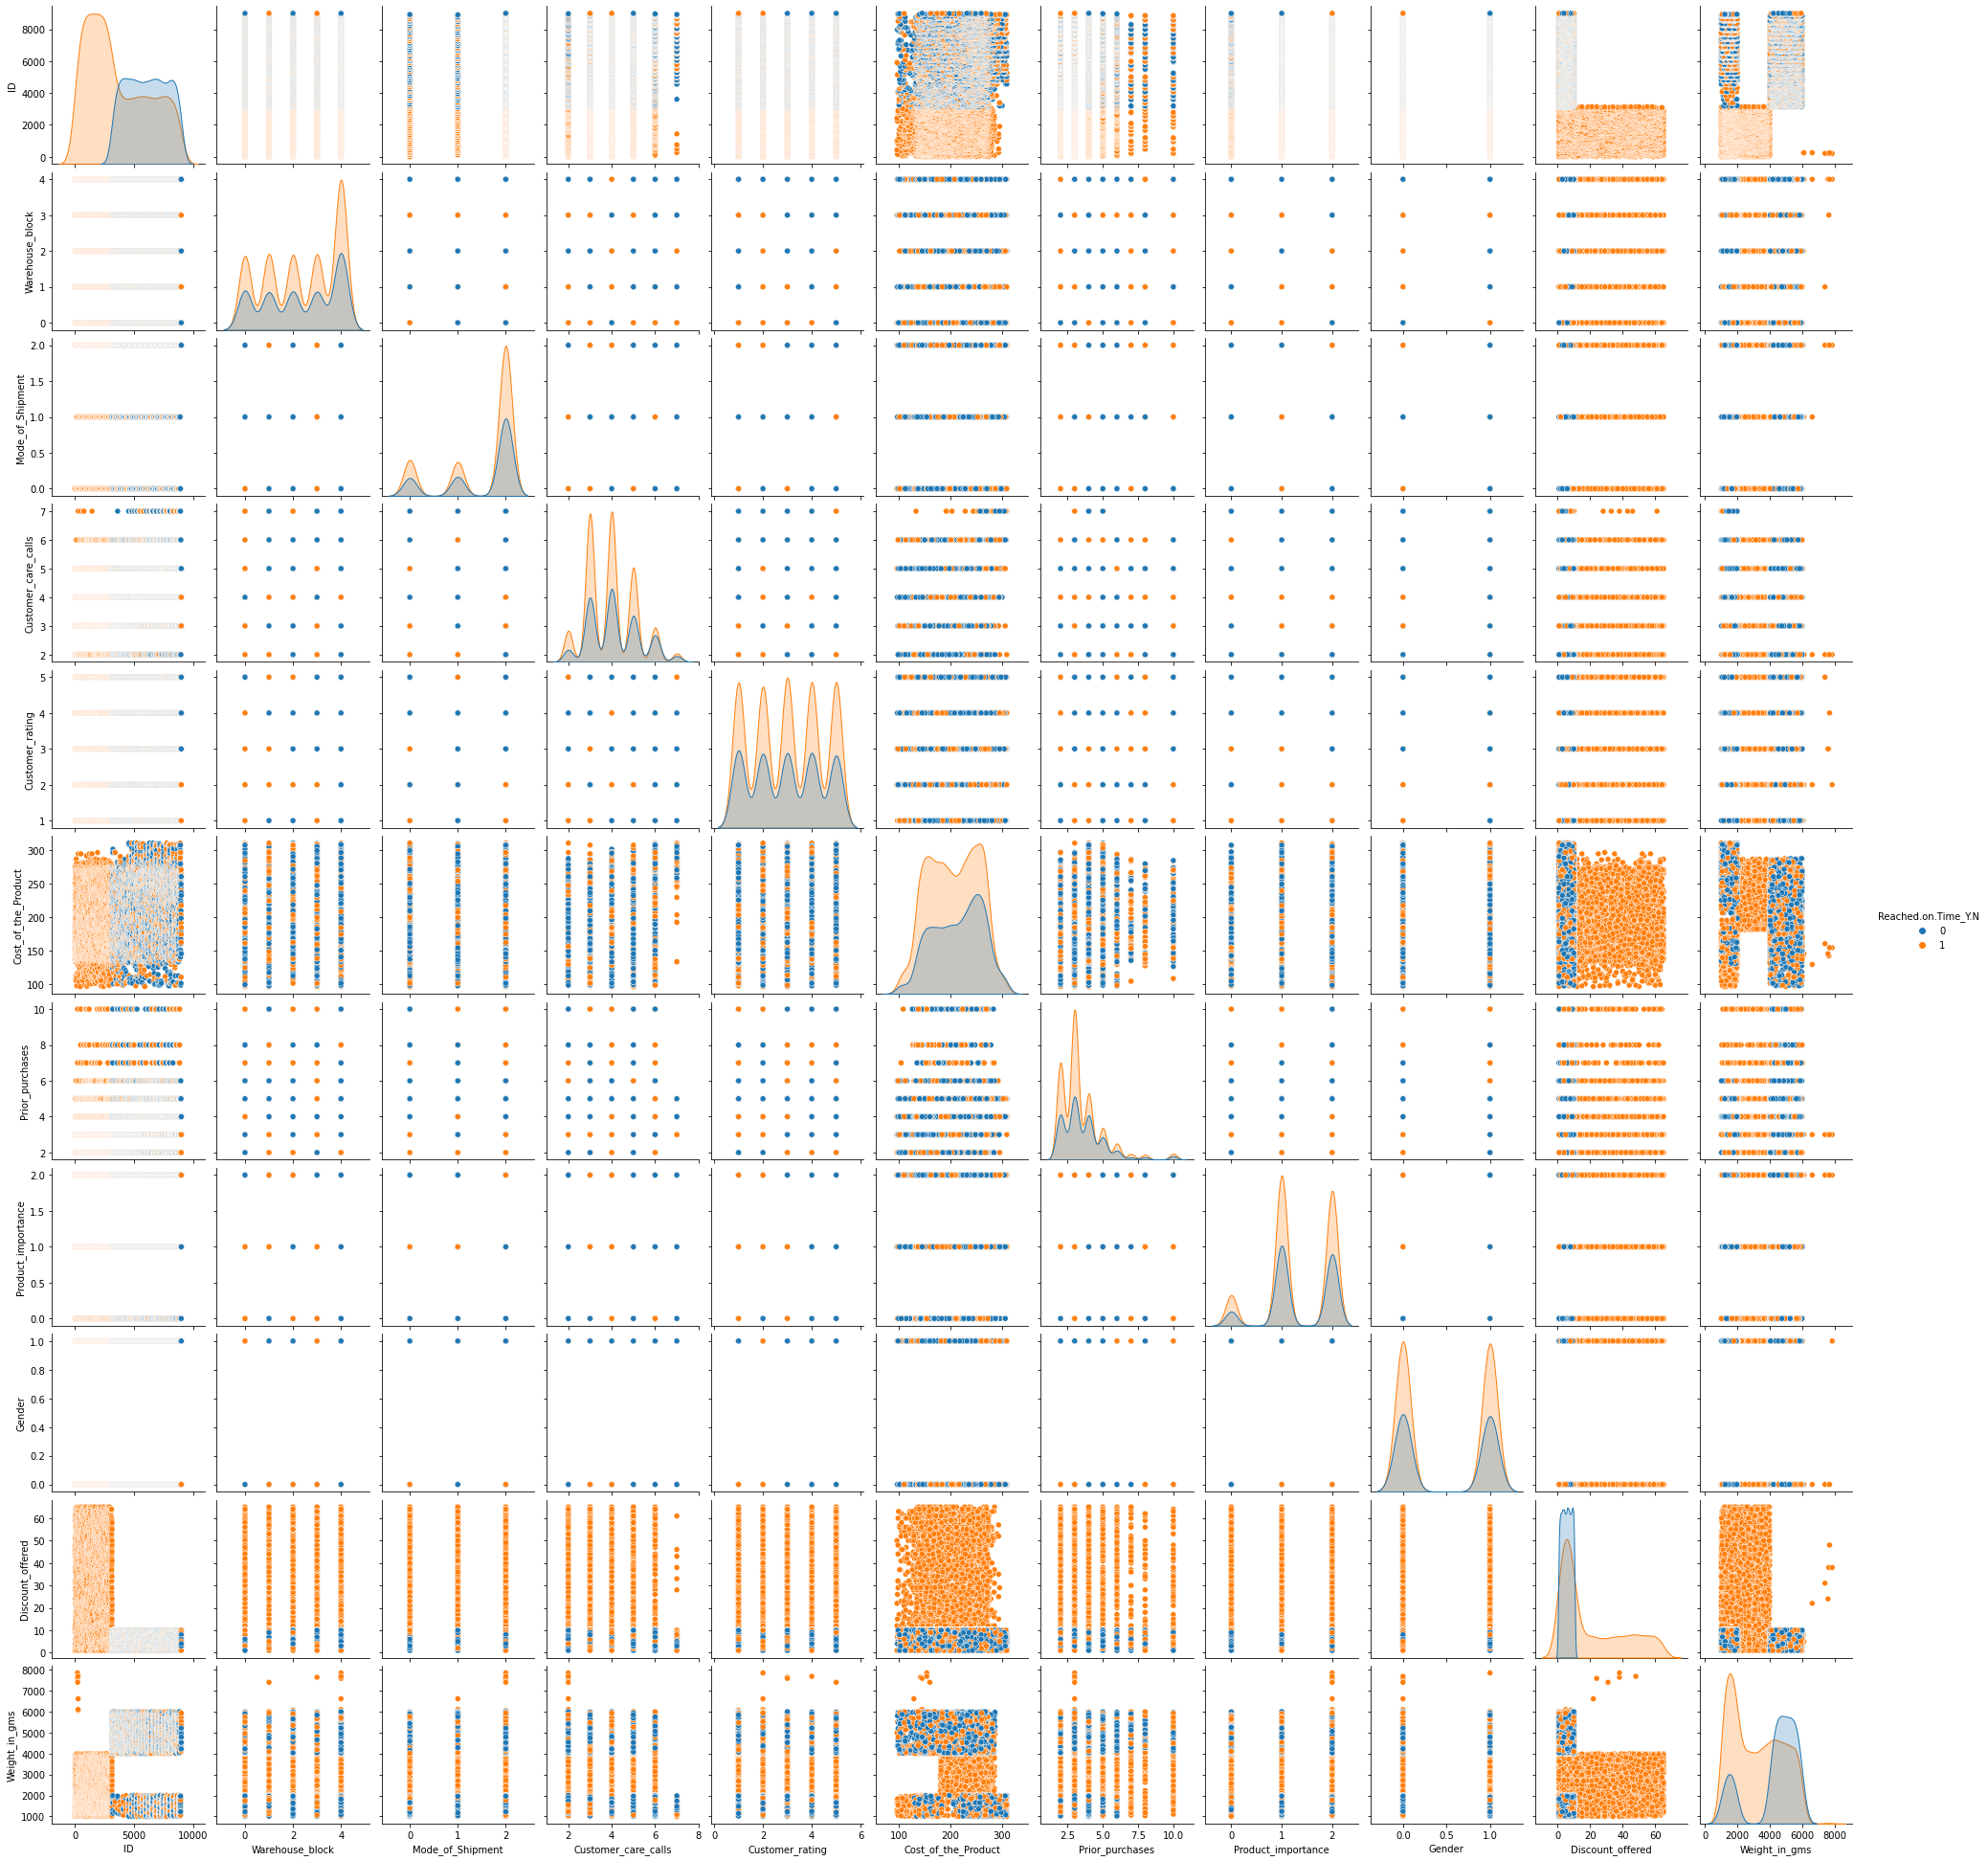

In [238]:
sns.pairplot(data_train2, hue='Reached.on.Time_Y.N')

miramos la correlacion entre variables, se dropean las columnas genero y compras anteriores ya que no se discrimina el tiempo de entrega segun el sexo 

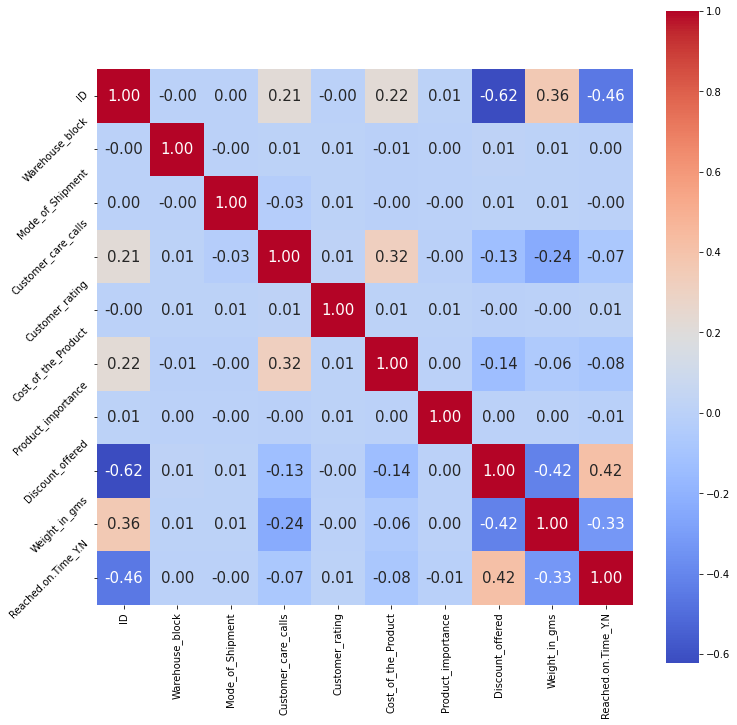

In [239]:
corr = data_train.drop(columns = ['Prior_purchases','Gender']).corr()  #is used for find corelation
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_train2.drop(columns = ['Prior_purchases','Gender']).columns, 
           yticklabels= data_train2.drop(columns = ['Prior_purchases','Gender']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

datta_train2 esta hecho codificacion label encoder a cada columna

In [232]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
data_train2['Mode_of_Shipment'] = label_encoder.fit_transform(data_train2['Mode_of_Shipment'])
data_train2['Product_importance'] = label_encoder.fit_transform(data_train2['Product_importance'])
data_train2['Gender'] = label_encoder.fit_transform(data_train2['Gender'])
data_train2['Warehouse_block'] = label_encoder.fit_transform(data_train2['Warehouse_block'])
#data_train2['Gender'] = label_encoder.fit_transform(data_train2['Gender'])

C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_18168\3213534162.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)


<AxesSubplot:>

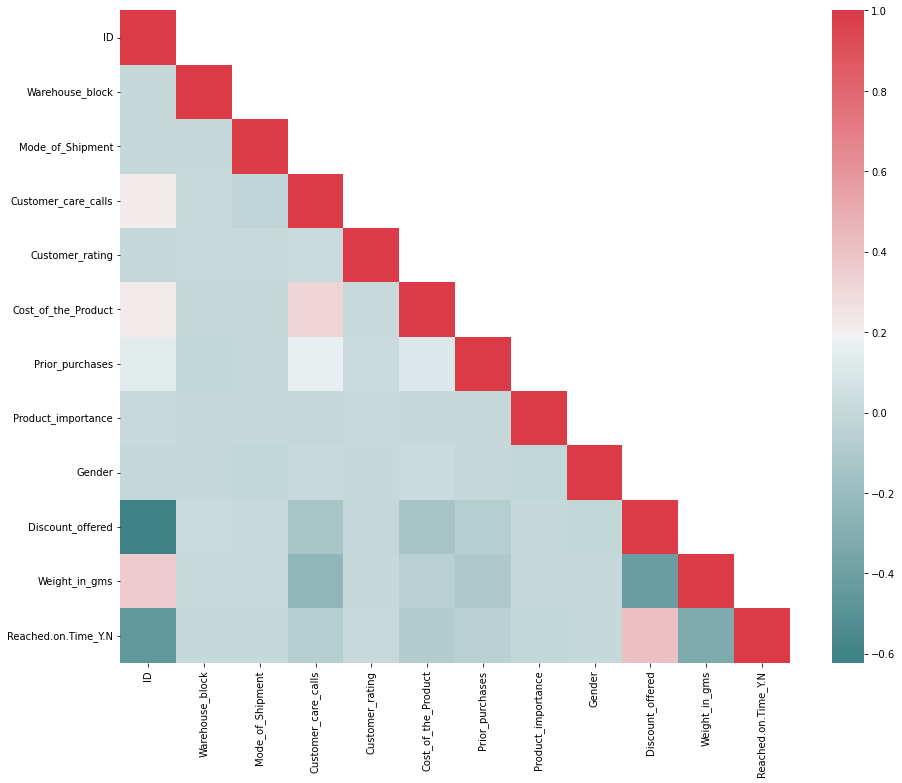

In [233]:
df_columns=data_train2.columns
X_corr= (data_train2[df_columns])
#X.corr()
# Sacamos el id
dt = X_corr
corr = dt.corr() #returns a dataframe, so it can be reused
# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(corr, cmap=sns.diverging_palette(200, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [240]:
data_train2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,3,2,3,1,217,3,1,0,1,4177,1
8995,8996,4,2,5,3,232,3,2,1,3,4526,0
8996,8997,0,2,4,5,260,3,2,0,6,4221,0
8997,8998,1,2,4,2,184,3,2,0,5,5931,1


De la prueba de chi cuadrado, podemos concluir que tres de las características categóricas independientes no están relacionadas con la variable de respuesta porque el valor de p es mayor que 0.05. Por lo tanto, estas funciones se pueden eliminar y solo se puede incluir la función de importancia del producto

In [236]:

crossTab = pd.crosstab(data_train2['Product_importance'],data_train2['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'Product_importance')

crossTab = pd.crosstab(data_train2['Prior_purchases'],data_train2['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'Prior_purchases')

crossTab = pd.crosstab(data_train2['Weight_in_gms'],data_train2['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'Weight_in_gms')

crossTab = pd.crosstab(data_train2['Cost_of_the_Product'],data_train2['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'Cost_of_the_Product')

crossTab = pd.crosstab(data_train2['Customer_rating'],data_train2['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'Customer_rating')

crossTab = pd.crosstab(data_train2['Discount_offered'],data_train2['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'Discount_offered')

p-value  0.175738927009453 Product_importance
p-value  1.6290003555917176e-16 Prior_purchases
p-value  4.300597753568518e-16 Weight_in_gms
p-value  0.0019823981766757363 Cost_of_the_Product
p-value  0.792341450310784 Customer_rating
p-value  0.0 Discount_offered


In [237]:
crossTab = pd.crosstab(data_train2['Warehouse_block'],data_train2['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'Warehouse_block')

crossTab = pd.crosstab(data_train2['Mode_of_Shipment'],data_train2['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1], 'mode of shipment')

p-value  0.9071521437355561 Warehouse_block
p-value  0.2568899601964812 mode of shipment


In [164]:
data_train2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


con select k beast seleccionamos el features mas ponderantes para el resultado buscado

In [241]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
selector = SelectKBest(mutual_info_regression, k=4)
X = data_train2[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']] 
y = data_train2[['Reached.on.Time_Y.N']]
selector.fit(X,y)

c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001D43BA37400>)

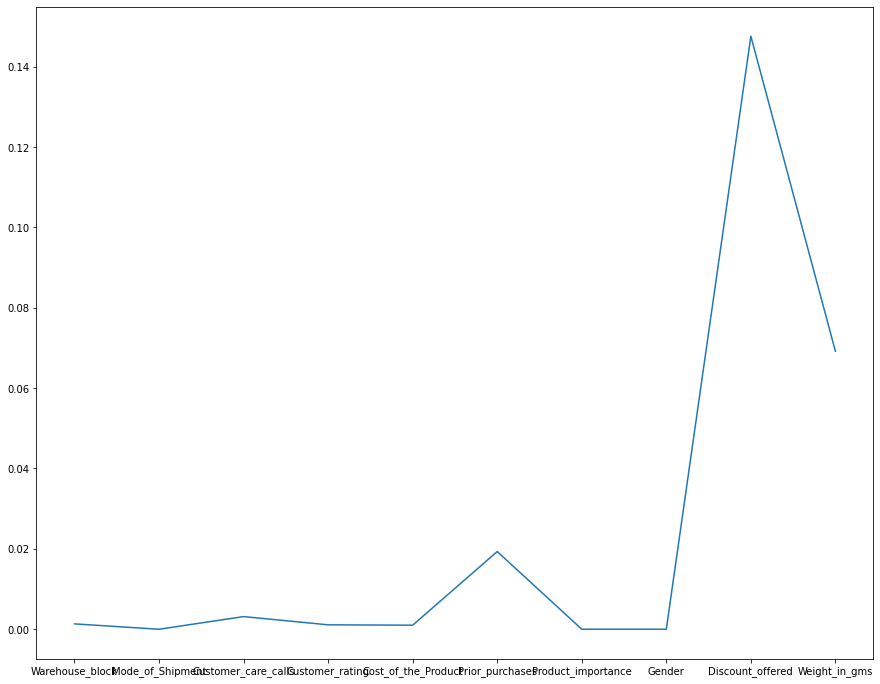

In [242]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [15,12]
plt.plot(scores)
plt.xticks(np.arange(10),list(X.columns));

In [243]:
scores

array([0.00133516, 0.        , 0.00314778, 0.00110029, 0.00100878,
       0.01932977, 0.        , 0.        , 0.1475449 , 0.06916107])

In [245]:
data_train2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,3,2,3,1,217,3,1,0,1,4177,1
8995,8996,4,2,5,3,232,3,2,1,3,4526,0
8996,8997,0,2,4,5,260,3,2,0,6,4221,0
8997,8998,1,2,4,2,184,3,2,0,5,5931,1


In [246]:
data_train3 = data_train2 

In [247]:
data_train3.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [248]:
data_train3 = pd.get_dummies(data_train3,columns=['Product_importance'], drop_first=True)
data_train3.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_1,Product_importance_2
0,1,3,0,4,2,177,3,0,44,1233,1,1,0
1,2,4,0,4,5,216,2,1,59,3088,1,1,0
2,3,0,0,2,2,183,4,1,48,3374,1,1,0
3,4,1,0,3,3,176,4,1,10,1177,1,0,1
4,5,2,0,2,2,184,3,0,46,2484,1,0,1


In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()
print(scaler.fit(data_train))
print(MinMaxScaler())
print(scaler.transform(data_train))

MinMaxScaler()
MinMaxScaler()
[[0.00000000e+00 7.50000000e-01 0.00000000e+00 ... 6.71875000e-01
  3.38933528e-02 1.00000000e+00]
 [1.11135808e-04 1.00000000e+00 0.00000000e+00 ... 9.06250000e-01
  3.04894083e-01 1.00000000e+00]
 [2.22271616e-04 0.00000000e+00 0.00000000e+00 ... 7.34375000e-01
  3.46676406e-01 1.00000000e+00]
 ...
 [9.99777728e-01 0.00000000e+00 1.00000000e+00 ... 7.81250000e-02
  4.70416362e-01 0.00000000e+00]
 [9.99888864e-01 2.50000000e-01 1.00000000e+00 ... 6.25000000e-02
  7.20233747e-01 1.00000000e+00]
 [1.00000000e+00 5.00000000e-01 1.00000000e+00 ... 4.68750000e-02
  5.53542732e-01 0.00000000e+00]]


In [94]:
scaler = StandardScaler()

#scaler.fit(data_train2[['Weight_in_gms']])

data_train2['Weight_in_gms'] = scaler.fit_transform(data_train2[['Weight_in_gms']])
data_train2['Cost_of_the_Product'] = scaler.fit_transform(data_train2[['Cost_of_the_Product']])
data_train2['Customer_care_calls'] = scaler.fit_transform(data_train2[['Customer_care_calls']])

In [172]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [173]:
data_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   8999 non-null   int64
 1   Warehouse_block      8999 non-null   int32
 2   Mode_of_Shipment     8999 non-null   int32
 3   Customer_care_calls  8999 non-null   int64
 4   Customer_rating      8999 non-null   int64
 5   Cost_of_the_Product  8999 non-null   int64
 6   Prior_purchases      8999 non-null   int64
 7   Product_importance   8999 non-null   int32
 8   Gender               8999 non-null   int32
 9   Discount_offered     8999 non-null   int64
 10  Weight_in_gms        8999 non-null   int64
 11  Reached.on.Time_Y.N  8999 non-null   int64
dtypes: int32(4), int64(8)
memory usage: 703.2 KB


In [174]:
data_train2[['Warehouse_block', 'Mode_of_Shipment',
        'Cost_of_the_Product', 'Product_importance','Discount_offered','Weight_in_gms']]
y = data_train2[['Reached.on.Time_Y.N']]
y

,Reached.on.Time_Y.N
0,1
1,1
2,1
3,1
4,1
...,...
8994,1
8995,0
8996,0
8997,1


([<matplotlib.patches.Wedge at 0x19c8f797940>,
 [Text(0.45428743828885293, 1.0018098239750655, '0'),
  Text(-0.454287532085056, -1.0018097814416014, '1')],
 [Text(0.24779314815755613, 0.5464417221682175, '36.45%'),
  Text(-0.24779319931912144, -0.5464416989681462, '63.55%')])

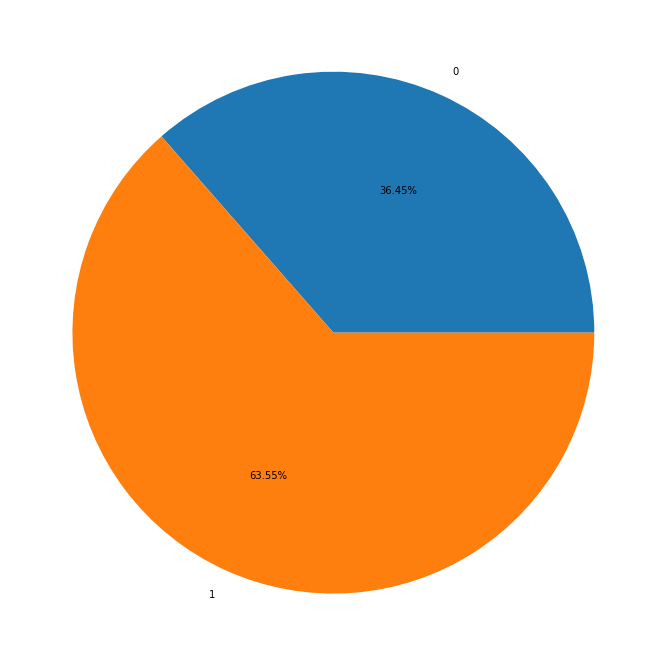

El 36,5% de los pedidos no llegan a tiempo

Text(0, 0.5, 'porcentaje')

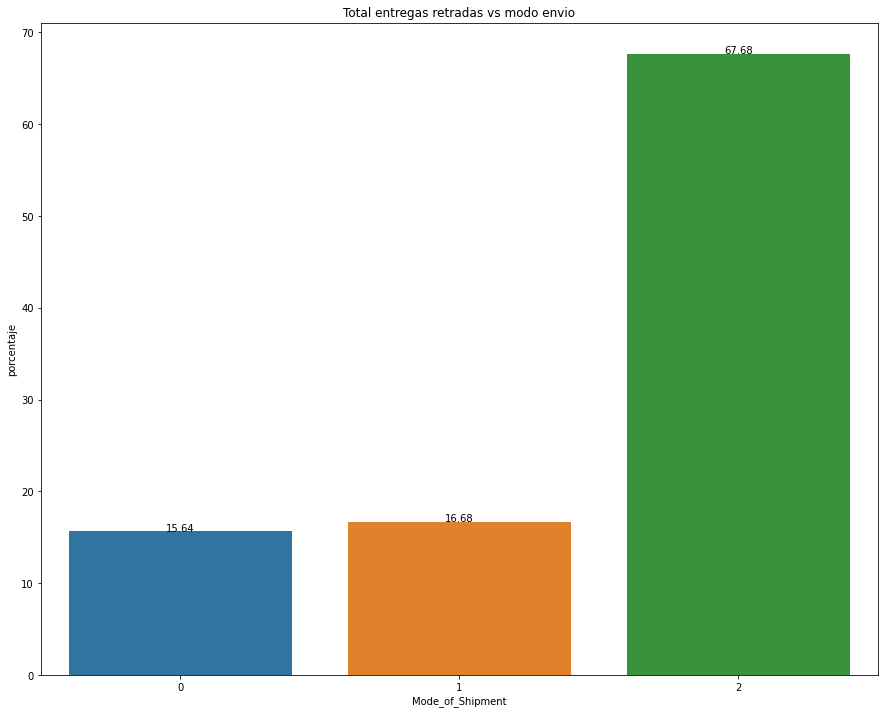

In [195]:
data_v2=pd.DataFrame((data_v1.groupby(['Mode_of_Shipment'])['ID'].count())/len(data_v1)*100)
data_v2=data_v2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=data_v2 )
for index, row in data_v2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total entregas retradas vs modo envio')
plt.ylabel('porcentaje')

In [200]:
data_train2['Mode_of_Shipment'].value_counts()

2    6122
0    1447
1    1430
Name: Mode_of_Shipment, dtype: int64

In [175]:
X = data_train2[['Warehouse_block', 'Mode_of_Shipment',
        'Cost_of_the_Product', 'Product_importance','Discount_offered','Weight_in_gms']] 
y = data_train2[['Reached.on.Time_Y.N']]

In [176]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [178]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7199, 6)
(1800, 6)
(7199, 1)
(1800, 1)


In [179]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)

LinearRegression()

In [180]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[[ 7.89175700e-04 -6.87326228e-03 -5.27396347e-04 -8.36310535e-03
   9.08578694e-03 -5.70760728e-05]]
[0.8348383]
6


In [181]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.18347482796657205
Error en datos de test: 0.1880053696382709


In [182]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7199, 6)
(1800, 6)
(7199, 1)
(1800, 1)


In [184]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = data_train2.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
108,Discount_offered,ID,-0.622558,0.622558
9,ID,Discount_offered,-0.622558,0.622558
11,ID,Reached.on.Time_Y.N,-0.457131,0.457131
132,Reached.on.Time_Y.N,ID,-0.457131,0.457131
118,Discount_offered,Weight_in_gms,-0.417782,0.417782
129,Weight_in_gms,Discount_offered,-0.417782,0.417782
141,Reached.on.Time_Y.N,Discount_offered,0.416357,0.416357
119,Discount_offered,Reached.on.Time_Y.N,0.416357,0.416357
120,Weight_in_gms,ID,0.361232,0.361232
10,ID,Weight_in_gms,0.361232,0.361232


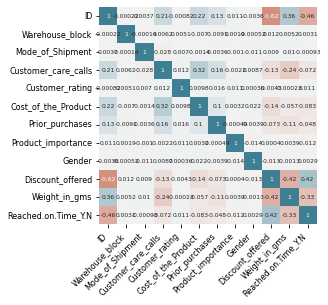

In [186]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [115]:
scaler = MinMaxScaler()

scaler.fit(data_train[['Reached.on.Time_Y.N']])

data_train['Reached.on.Time_Y.N'] = scaler.transform(data_train[['Reached.on.Time_Y.N']])
print(scaler.transform(data_train['Reached.on.Time_Y.N']))

c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [116]:
scaler.fit_transform(data_train['Reached.on.Time_Y.N'])

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

##### 1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [11]:
## Número total de camas de UCI pediátricas ocupadas por pacientes con COVID-19 positivo confirmado por laboratorio. Este es un subconjunto de #6c, camas de UCI pediátricas ocupadas. Este recuento excluye la NICU, la sala de recién nacidos y las camas de cirugía ambulatoria. Este campo es obligatorio a partir del 2/2/2022. Consulte el Apéndice D para conocer la definición de COVID-19 confirmado por laboratorio.
'staffed_icu_pediatric_patients_confirmed_covid'

## Pacientes informados actualmente hospitalizados en una cama de UCI para adultos que han confirmado COVID-19 en este estado
'staffed_icu_adult_patients_confirmed_covid'


##Pacientes informados actualmente hospitalizados en una cama para adultos que tienen COVID-19 confirmado por laboratorio. Esto incluye aquellos en camas de observación.
'total_adult_patients_hospitalized_confirmed_covid'


#Pacientes informados actualmente hospitalizados en una cama de hospitalización pediátrica, incluidos NICU, recién nacidos y salas de recién nacidos, que son positivos para COVID-19 confirmados por laboratorio. Esto incluye aquellos en camas de observación.
'total_pediatric_patients_hospitalized_confirmed_covid'

'total_pediatric_patients_hospitalized_confirmed_covid'

In [13]:
camas = pd.DataFrame()

fecha_inicio = "2020-01-01"
fecha_fin = "2020-07-01"
camas['Fecha'] = data['date']
camas['Estado'] = data['state']
camas['Camas_UCI'] = data['total_adult_patients_hospitalized_confirmed_covid']
camas['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_UCI'] = data['staffed_icu_adult_patients_confirmed_covid']
camas['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_hospitalización_pediátrica'] = data['total_pediatric_patients_hospitalized_confirmed_covid']



In [14]:
camas

,Fecha,Estado,Camas_UCI,Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_UCI,Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_hospitalización_pediátrica
0,2020-12-27,RI,420.0,54.0,5.0
1,2020-12-22,IA,634.0,138.0,4.0
2,2020-10-16,VT,0.0,0.0,0.0
3,2020-10-15,VI,4.0,1.0,0.0
4,2020-10-13,VI,4.0,1.0,0.0
...,...,...,...,...,...
47742,2022-02-16,TN,2163.0,436.0,39.0
47743,2022-02-04,UT,706.0,172.0,6.0
47744,2022-02-18,MA,581.0,128.0,17.0
47745,2022-02-01,IN,2382.0,537.0,35.0


In [15]:
# Pasando a INT  total_adult_patients_hospitalized_confirmed_covid
camas['Camas_UCI'] = camas['Camas_UCI'].astype(int)

# Pasando a INT  total_pediatric_patients_hospitalized_confirmed_covid
camas['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_UCI'] = camas['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_UCI'].astype(int)

# Pasando a INT  total_pediatric_patients_hospitalized_confirmed_covid
camas['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_hospitalización_pediátrica'] = camas['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_hospitalización_pediátrica'].astype(int)


In [16]:
camas = camas[(camas['Fecha'] >= fecha_inicio) & (camas['Fecha'] < fecha_fin)]

In [17]:
# Camas por estados
camas_estado = camas.groupby('Estado').sum([['Camas_UCI'],['hospitalización_cama_covid_utilización'],['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_UCI']])

In [18]:
camas_estado.tail(40)

,Camas_UCI,Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_UCI,Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_hospitalización_pediátrica
Estado,,,
ID,0,0,0
IL,0,0,0
IN,0,0,0
KS,0,0,0
KY,0,0,0
LA,40452,0,0
MA,0,0,0
MD,0,0,0
ME,0,0,0


In [19]:
camas_estado['Mayor_Ocupacion'] = camas_estado['Camas_UCI'] + camas_estado['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_UCI'] + camas_estado['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_hospitalización_pediátrica'] +  camas_estado['Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_hospitalización_pediátrica']

In [20]:
camas_estado.head(20)

,Camas_UCI,Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_UCI,Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_hospitalización_pediátrica,Mayor_Ocupacion
Estado,,,,
AK,0,3,0,3
AL,0,0,0,0
AR,0,0,0,0
AZ,5177,0,0,5177
CA,36134,0,0,36134
CO,0,0,0,0
CT,0,0,0,0
DC,0,0,0,0
DE,0,0,0,0


Total de camas con Mayor Ocupacion

In [21]:
camas_estado.sort_values(by="Mayor_Ocupacion", ascending=False).head(5)

,Camas_UCI,Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_UCI,Pacientes_informados_actualmente_hospitalizados_en_una_cama_de_hospitalización_pediátrica,Mayor_Ocupacion
Estado,,,,
LA,40452,0,0,40452
CA,36134,0,0,36134
NV,20089,1985,45,22164
AZ,5177,0,0,5177
IA,3174,1437,0,4611


In [22]:
camas_estado.reset_index('Estado', inplace = True)

2022-09-11 22:28:06.186 
  command:

    streamlit run c:\Users\Manuel Revelo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

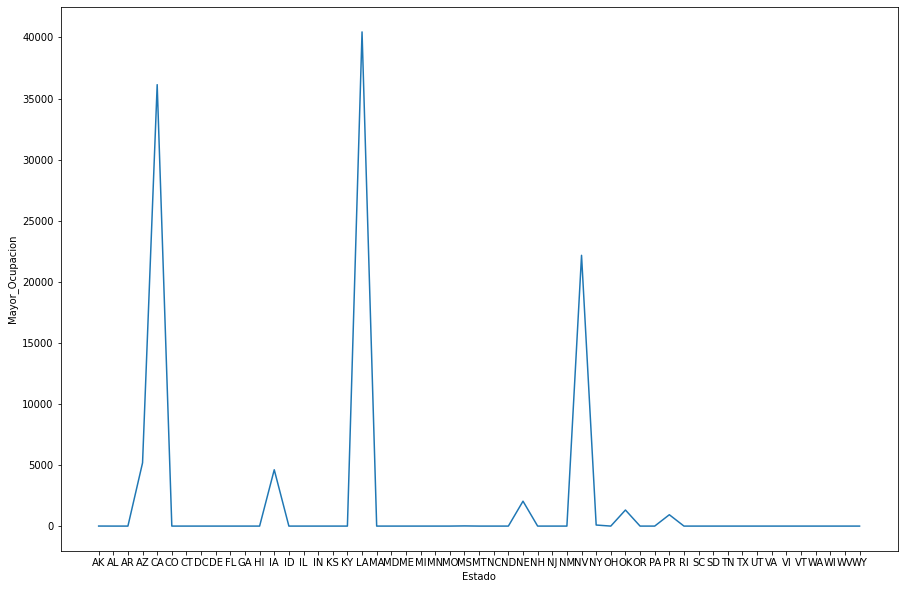

In [23]:
fig, ax = plt.subplots()
sns.lineplot(x='Estado', y='Mayor_Ocupacion', data=camas_estado, ax=ax)
plt.gcf().set_size_inches(15, 10)

plt.savefig("camas_estados_total.jpg", bbox_inches='tight')
st.pyplot(fig)

In [24]:
import plotly.express as px

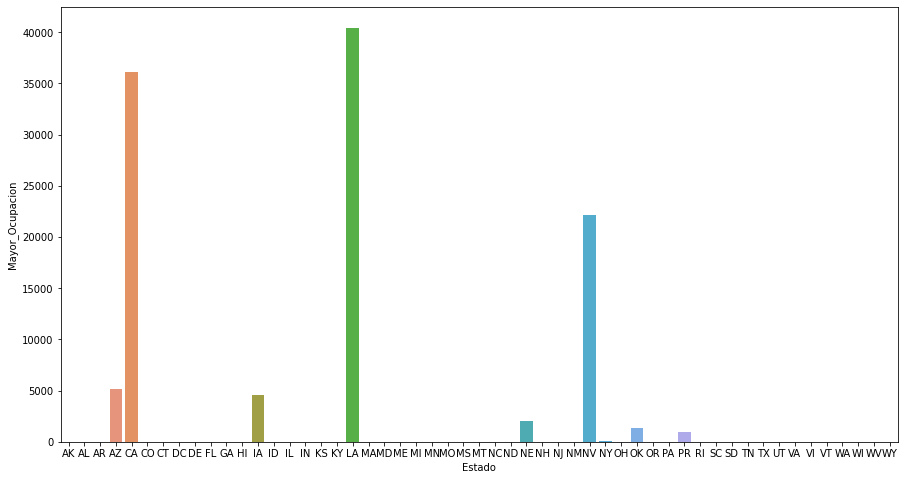

In [25]:
ax = sns.barplot(x="Estado", y="Mayor_Ocupacion", data=camas_estado)
plt.gcf().set_size_inches(15, 8)
plt.savefig("ranking_estados.jpg", bbox_inches='tight')

In [26]:
fig = px.bar(camas_estado, x='Estado', y='Mayor_Ocupacion')
fig.show()

#### 2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

Intervalos de crecimiento y decrecimiento
Puntos críticos (mínimos y máximos)

In [27]:
df_ny = pd.DataFrame()

fecha_inicio = "2020-05-20"
fecha_fin = "2020-12-31"
df_ny['Fecha'] = data['date']
df_ny['Estado'] = data['state']
df_ny['Camas_covid'] = data['inpatient_bed_covid_utilization']
df_ny['total_de_pacientes_adultos_hospitalizados_covid_confirmado'] = data['total_adult_patients_hospitalized_confirmed_covid']
df_ny['total_de_pacientes_pediátricos_hospitalizados_covid_confirmado'] = data['total_pediatric_patients_hospitalized_confirmed_covid']





In [28]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47747 entries, 0 to 47746
Data columns (total 5 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Fecha                                                           47747 non-null  datetime64[ns]
 1   Estado                                                          47747 non-null  object        
 2   Camas_covid                                                     47747 non-null  float64       
 3   total_de_pacientes_adultos_hospitalizados_covid_confirmado      47747 non-null  float64       
 4   total_de_pacientes_pediátricos_hospitalizados_covid_confirmado  47747 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.8+ MB


In [29]:
data['inpatient_bed_covid_utilization']

0        0.191602
1        0.083228
2        0.001594
3        0.021277
4        0.021277
           ...   
47742    0.114309
47743    0.127508
47744    0.039278
47745    0.179617
47746    0.215927
Name: inpatient_bed_covid_utilization, Length: 47747, dtype: float64

Pasamos los datos a enteros

In [30]:
df_ny['Camas_covid'] = df_ny['Camas_covid'].astype(int)
df_ny['total_de_pacientes_adultos_hospitalizados_covid_confirmado'] = df_ny['total_de_pacientes_adultos_hospitalizados_covid_confirmado'].astype(int)
df_ny['total_de_pacientes_pediátricos_hospitalizados_covid_confirmado'] = df_ny['total_de_pacientes_pediátricos_hospitalizados_covid_confirmado'].astype(int)

In [31]:
meses = df_ny

In [32]:
meses = meses[(meses['Fecha'] >= fecha_inicio) & (meses['Fecha'] < fecha_fin)]

In [33]:
meses.head(10)

,Fecha,Estado,Camas_covid,total_de_pacientes_adultos_hospitalizados_covid_confirmado,total_de_pacientes_pediátricos_hospitalizados_covid_confirmado
0,2020-12-27,RI,0,420,5
1,2020-12-22,IA,0,634,4
2,2020-10-16,VT,0,0,0
3,2020-10-15,VI,0,4,0
4,2020-10-13,VI,0,4,0
5,2020-10-12,VT,0,0,0
6,2020-10-09,RI,0,116,1
7,2020-10-07,VI,0,2,0
8,2020-10-04,UT,0,164,6
9,2020-10-03,VI,0,3,0


In [36]:
nueva_york = meses

In [37]:
nueva_york.tail()

,Fecha,Estado,Camas_covid,total_de_pacientes_adultos_hospitalizados_covid_confirmado,total_de_pacientes_pediátricos_hospitalizados_covid_confirmado
46100,2020-12-30,UT,0,495,1
46139,2020-12-28,HI,0,82,2
46206,2020-12-29,CO,0,1046,18
46354,2020-12-27,AK,0,71,3
46547,2020-12-30,MT,0,203,2


In [40]:
nueva_york.head()

,Fecha,Estado,Camas_covid,total_de_pacientes_adultos_hospitalizados_covid_confirmado,total_de_pacientes_pediátricos_hospitalizados_covid_confirmado
0,2020-12-27,RI,0,420,5
1,2020-12-22,IA,0,634,4
2,2020-10-16,VT,0,0,0
3,2020-10-15,VI,0,4,0
4,2020-10-13,VI,0,4,0


In [41]:
nueva_york = meses

In [42]:
nueva_york = meses[meses['Estado'] == 'NY']

In [43]:
nueva_york.tail()

,Fecha,Estado,Camas_covid,total_de_pacientes_adultos_hospitalizados_covid_confirmado,total_de_pacientes_pediátricos_hospitalizados_covid_confirmado
21102,2020-05-23,NY,0,1,0
21574,2020-05-20,NY,0,2,0
36106,2020-12-28,NY,0,7943,54
38297,2020-12-29,NY,0,7998,51
44285,2020-12-30,NY,0,8133,50


In [44]:
mediana1=nueva_york['total_de_pacientes_adultos_hospitalizados_covid_confirmado'].mean()
mediana2=nueva_york['total_de_pacientes_pediátricos_hospitalizados_covid_confirmado'].mean()
mediana3=nueva_york['Camas_covid'].mean()

In [46]:
print(mediana1)
print(mediana2)
print(mediana3)


1442.391111111111
21.2
0.0


In [47]:
nueva_york_3 = nueva_york

In [48]:
nueva_york_3 = nueva_york.groupby('Estado').sum([['total_de_pacientes_adultos_hospitalizados_covid_confirmado'],['total_de_pacientes_pediátricos_hospitalizados_covid_confirmado']])

In [49]:
nueva_york_3['total_camas_ocupadas'] = nueva_york_3['total_de_pacientes_adultos_hospitalizados_covid_confirmado'] + nueva_york_3['total_de_pacientes_pediátricos_hospitalizados_covid_confirmado']

In [50]:
nueva_york_3.groupby("Estado").sum().sort_values(by="total_camas_ocupadas", ascending=False).head()

,Camas_covid,total_de_pacientes_adultos_hospitalizados_covid_confirmado,total_de_pacientes_pediátricos_hospitalizados_covid_confirmado,total_camas_ocupadas
Estado,,,,
NY,0,324538,4770,329308


In [51]:
nueva_york

,Fecha,Estado,Camas_covid,total_de_pacientes_adultos_hospitalizados_covid_confirmado,total_de_pacientes_pediátricos_hospitalizados_covid_confirmado
590,2020-09-09,NY,0,510,11
608,2020-11-08,NY,0,1577,18
637,2020-12-01,NY,0,3984,28
705,2020-09-26,NY,0,554,19
726,2020-08-18,NY,0,586,17
...,...,...,...,...,...
21102,2020-05-23,NY,0,1,0
21574,2020-05-20,NY,0,2,0
36106,2020-12-28,NY,0,7943,54
38297,2020-12-29,NY,0,7998,51


<AxesSubplot:xlabel='Fecha', ylabel='total_de_pacientes_adultos_hospitalizados_covid_confirmado'>

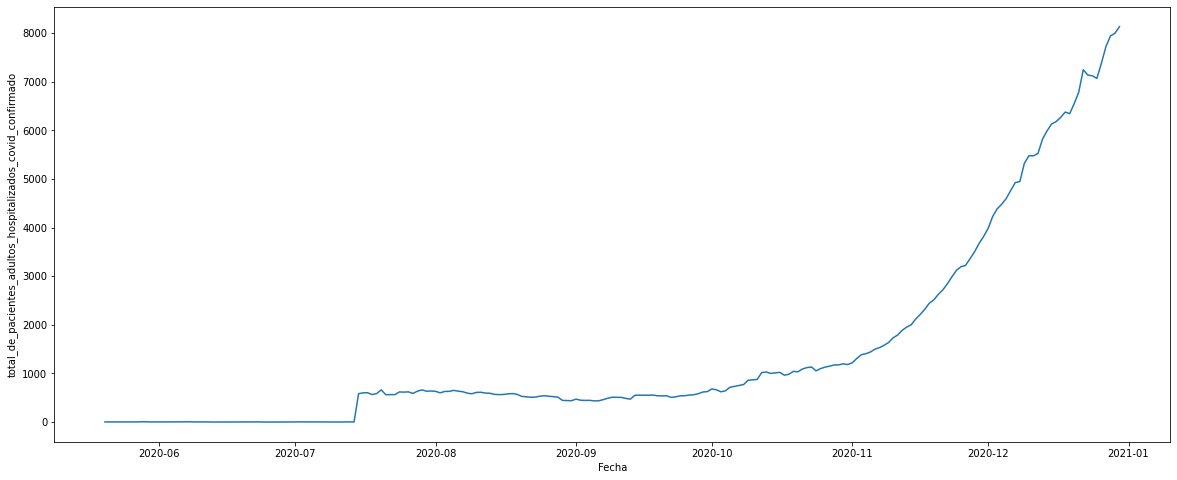

In [52]:
nueva_york = nueva_york#.sort_values(by='total_patients_hospitalized_confirmed_covid', ascending=False).head()
plt.figure(figsize = (20,8))
sns.lineplot(x = 'Fecha', y = 'total_de_pacientes_adultos_hospitalizados_covid_confirmado',data = nueva_york)

In [53]:
nueva_york.max()

Fecha                                                             2020-12-30 00:00:00
Estado                                                                             NY
Camas_covid                                                                         0
total_de_pacientes_adultos_hospitalizados_covid_confirmado                       8133
total_de_pacientes_pediátricos_hospitalizados_covid_confirmado                    285
dtype: object

In [54]:
nueva_york_3.max()


Camas_covid                                                            0
total_de_pacientes_adultos_hospitalizados_covid_confirmado        324538
total_de_pacientes_pediátricos_hospitalizados_covid_confirmado      4770
total_camas_ocupadas                                              329308
dtype: int32

In [55]:
nueva_york.min()

Fecha                                                             2020-05-20 00:00:00
Estado                                                                             NY
Camas_covid                                                                         0
total_de_pacientes_adultos_hospitalizados_covid_confirmado                          0
total_de_pacientes_pediátricos_hospitalizados_covid_confirmado                      0
dtype: object

#### 3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [56]:
uci = pd.DataFrame()

fecha_inicio = "2020-01-01"
fecha_fin = "2020-12-31"
uci['Fecha'] = data['date']
uci['Estado'] = data['state']
uci['Ocupación_de_camas_de_UCI_para_adultos_con_personal'] = data['staffed_adult_icu_bed_occupancy']
uci['Ocupación_de_camas_en_la_UCI_pediátrica_con_personal'] = data['staffed_pediatric_icu_bed_occupancy']

In [57]:
data_2020 = uci

In [59]:
data_2020 = uci[(uci['Fecha'] >= fecha_inicio) & (uci['Fecha'] <= fecha_fin)]

In [60]:
data_2020.tail()

,Fecha,Estado,Ocupación_de_camas_de_UCI_para_adultos_con_personal,Ocupación_de_camas_en_la_UCI_pediátrica_con_personal
46139,2020-12-28,HI,128.0,69.0
46206,2020-12-29,CO,920.0,286.0
46354,2020-12-27,AK,78.0,46.0
46547,2020-12-30,MT,152.0,32.0
46603,2020-12-31,NC,2048.0,0.0


In [61]:
data_2020['Ocupación_de_camas_de_UCI_para_adultos_con_personal'] = data_2020['Ocupación_de_camas_de_UCI_para_adultos_con_personal'].astype(int)

data_2020['Ocupación_de_camas_en_la_UCI_pediátrica_con_personal'] = data_2020['Ocupación_de_camas_en_la_UCI_pediátrica_con_personal'].astype(int)

C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_17492\1327931242.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_17492\1327931242.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
uci['Ocupación_de_camas_de_UCI_para_adultos_con_personal'].sum()

45569263.0

In [64]:
estados_2 = data_2020

In [65]:
# Agrupacion por Estado
estados_2 = data_2020.groupby('Estado').sum([['Ocupación_de_camas_de_UCI_para_adultos_con_personal'],['Ocupación_de_camas_en_la_UCI_pediátrica_con_personal']])

In [66]:
estados_2.head(10)

,Ocupación_de_camas_de_UCI_para_adultos_con_personal,Ocupación_de_camas_en_la_UCI_pediátrica_con_personal
Estado,,
AK,12871,6884
AL,211593,2259
AR,123384,38465
AZ,184004,27852
CA,901654,221557
CO,133634,37251
CT,89041,26255
DC,41733,27123
DE,19715,13868


In [67]:
data_2020['Ocupación_de_camas_de_UCI_para_adultos_con_personal'].sum()

9829982

In [68]:
uci['Ocupación_de_camas_de_UCI_para_adultos_con_personal'].sum()

45569263.0

In [69]:
estados_2['total_camas_uci'] = estados_2['Ocupación_de_camas_de_UCI_para_adultos_con_personal'] + estados_2['Ocupación_de_camas_en_la_UCI_pediátrica_con_personal']

In [70]:
estados_2.groupby("Estado").sum().sort_values(by="total_camas_uci", ascending=False).head()

,Ocupación_de_camas_de_UCI_para_adultos_con_personal,Ocupación_de_camas_en_la_UCI_pediátrica_con_personal,total_camas_uci
Estado,,,
CA,901654,221557,1123211
TX,991193,55836,1047029
FL,799387,96279,895666
NY,495372,137917,633289
PA,465537,102167,567704


In [71]:
estados_2.reset_index('Estado', inplace = True)

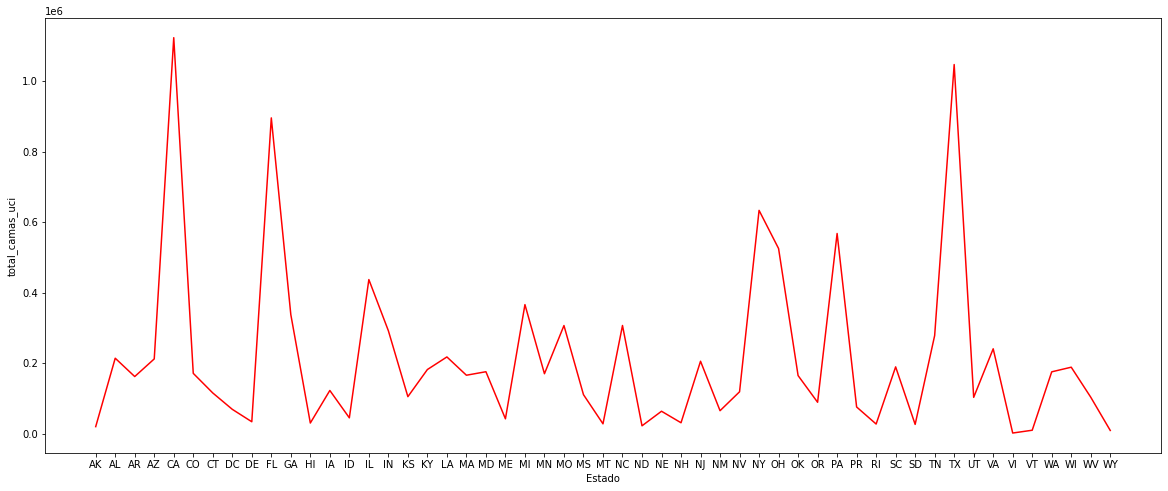

In [72]:
plt.figure(figsize = (20,8))
sns.lineplot(x ='Estado', y = 'total_camas_uci', data=estados_2, color='red')
plt.savefig("Total_camas2.jpg", bbox_inches='tight')

#st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

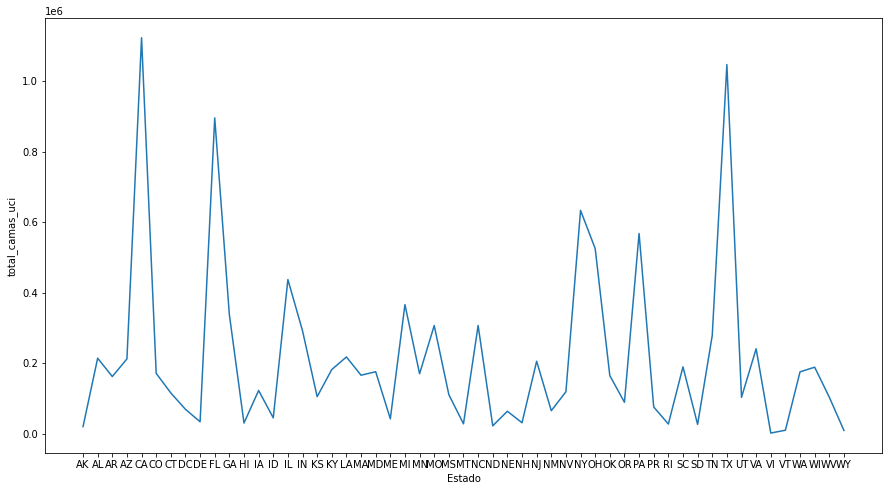

In [73]:
fig, ax = plt.subplots()
sns.lineplot(x='Estado', y='total_camas_uci', data=estados_2, ax=ax)
plt.gcf().set_size_inches(15, 8)

plt.savefig("Total_camas.jpg", bbox_inches='tight')
st.pyplot(fig)

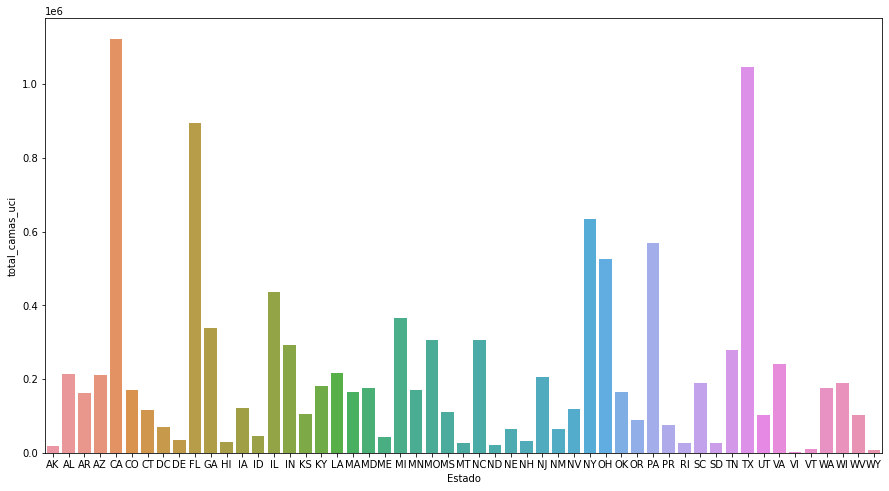

In [74]:
ax = sns.barplot(x="Estado", y="total_camas_uci", data=estados_2)
plt.gcf().set_size_inches(15, 8)
plt.savefig("Total_camas2.box.jpg", bbox_inches='tight')


### 4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [75]:
pediatricos = pd.DataFrame()

fecha_inicio = "2020-01-01"
fecha_fin = "2020-12-31"
pediatricos['Fecha'] = data['date']
pediatricos['Estado'] = data['state']
pediatricos['total_pacientes_pediatricos_hospitalizados_confirmados_covid'] = data['total_pediatric_patients_hospitalized_confirmed_covid']
pediatricos['todas_las_camas_de_hospitalización_pediátrica_ocupadas'] = data['all_pediatric_inpatient_bed_occupied']
pediatricos['pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid'] = data['staffed_icu_pediatric_patients_confirmed_covid']
pediatricos['Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal'] = data['staffed_pediatric_icu_bed_occupancy']

In [76]:
data_2020 = pediatricos

In [77]:
data_2020 = pediatricos[(pediatricos['Fecha'] >= fecha_inicio) & (pediatricos['Fecha'] <= fecha_fin)]

In [78]:
data_2020.tail()

,Fecha,Estado,total_pacientes_pediatricos_hospitalizados_confirmados_covid,todas_las_camas_de_hospitalización_pediátrica_ocupadas,pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid,Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal
46139,2020-12-28,HI,2.0,105.0,0.0,69.0
46206,2020-12-29,CO,18.0,693.0,0.0,286.0
46354,2020-12-27,AK,3.0,125.0,0.0,46.0
46547,2020-12-30,MT,2.0,194.0,0.0,32.0
46603,2020-12-31,NC,32.0,263.0,0.0,0.0


In [79]:
# Pasando a INT  total_pediatric_patients_hospitalized_confirmed_covid
data_2020['total_pacientes_pediatricos_hospitalizados_confirmados_covid'] = data_2020['total_pacientes_pediatricos_hospitalizados_confirmados_covid'].astype(int)

# Pasando a INT  all_pediatric_inpatient_bed_occupied
data_2020['todas_las_camas_de_hospitalización_pediátrica_ocupadas'] = data_2020['todas_las_camas_de_hospitalización_pediátrica_ocupadas'].astype(int)

# Pasando a INT  staffed_icu_pediatric_patients_confirmed_covid
data_2020['pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid'] = data_2020['pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid'].astype(int)

# Pasando a INT  all_pediatric_inpatient_bed_occupied
data_2020['Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal'] = data_2020['Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal'].astype(int)

C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_17492\1119250857.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_17492\1119250857.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_17492\1119250857.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [80]:
# Agrupando por Estado
pacientes_pedriaticos = data_2020.groupby('Estado').sum([['total_pacientes_pediatricos_hospitalizados_confirmados_covid'],['todas_las_camas_de_hospitalización_pediátrica_ocupadas'], ['pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid'], ['Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal']])
pacientes_pedriaticos.head(10)

,total_pacientes_pediatricos_hospitalizados_confirmados_covid,todas_las_camas_de_hospitalización_pediátrica_ocupadas,pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid,Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal
Estado,,,,
AK,351,14955,38,6884
AL,2902,1557,39,2259
AR,1637,109695,406,38465
AZ,5739,122549,625,27852
CA,9979,483142,989,221557
CO,3261,106278,191,37251
CT,598,61821,11,26255
DC,934,70438,245,27123
DE,538,35866,2,13868


In [81]:
pacientes_pedriaticos = data_2020

In [82]:
pacientes_pedriaticos['total_pacientes_pediatricos'] =  pacientes_pedriaticos['pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid'] + pacientes_pedriaticos['Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal']

C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_17492\1662390654.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
pacientes_pedriaticos.head(5)

,Fecha,Estado,total_pacientes_pediatricos_hospitalizados_confirmados_covid,todas_las_camas_de_hospitalización_pediátrica_ocupadas,pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid,Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal,total_pacientes_pediatricos
0,2020-12-27,RI,5,542,0,70,70
1,2020-12-22,IA,4,0,0,0,0
2,2020-10-16,VT,0,46,0,19,19
3,2020-10-15,VI,0,0,0,0,0
4,2020-10-13,VI,0,0,0,0,0


In [84]:
pacientes_pedriaticos.groupby("Estado").sum().sort_values(by="total_pacientes_pediatricos", ascending=False).head()

,total_pacientes_pediatricos_hospitalizados_confirmados_covid,todas_las_camas_de_hospitalización_pediátrica_ocupadas,pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid,Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal,total_pacientes_pediatricos
Estado,,,,,
CA,9979,483142,989,221557,222546
NY,4815,440365,355,137917,138272
PA,5776,280480,252,102167,102419
FL,7492,199158,284,96279,96563
IL,5255,274279,444,88676,89120


In [85]:
pacientes_pedriaticos.to_csv('camas_estado_covid.csv')

In [86]:
pacientes_pedriaticos.sum()

C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_17492\3551682211.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Estado                                                           RIIAVTVIVIVTRIVIUTVIVTVIVTVIVTVIVIVTAKVISDVIAK...
total_pacientes_pediatricos_hospitalizados_confirmados_covid                                                112549
todas_las_camas_de_hospitalización_pediátrica_ocupadas                                                     4645389
pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid                                                 9797
Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal                                                        1580479
total_pacientes_pediatricos                                                                                1590276
dtype: object

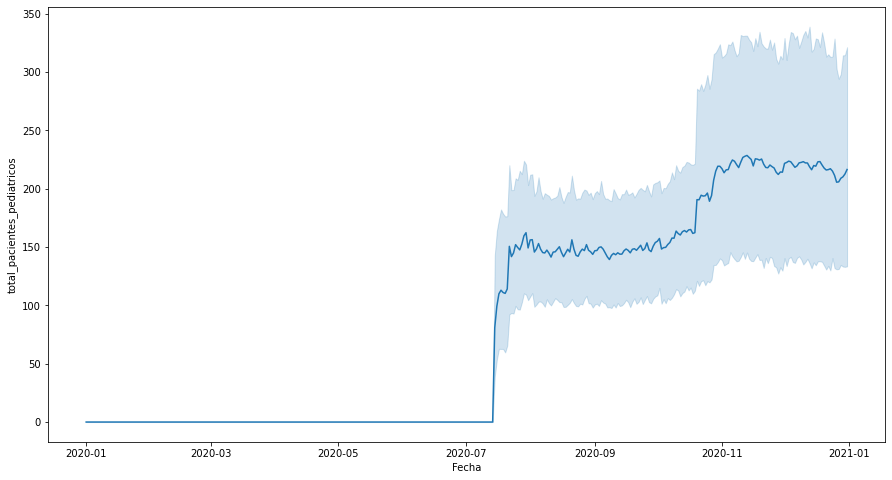

In [88]:
sns.lineplot(x='Fecha', y='total_pacientes_pediatricos', data=pacientes_pedriaticos)
plt.gcf().set_size_inches(15, 8)

plt.show()

### 5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [121]:
#Porcentaje del total de camas de UCI para adultos con personal actualmente utilizadas por pacientes con sospecha o confirmación de COVID-19 en este estado. Este número solo tiene en cuenta los hospitales en el estado que informan los campos " pacientes adultos en UCI con personal confirmado y sospechoso de covid " y " camas en UCI para adultos con personal total ".
'adult_icu_bed_covid_utilization'

'adult_icu_bed_covid_utilization'

In [122]:
porcentaje_uci = pd.DataFrame()

fecha_inicio = "2020-01-01"
fecha_fin = "2020-12-31"
porcentaje_uci['Fecha'] = data['date']
porcentaje_uci['Estado'] = data['state']
porcentaje_uci['Porcentaje_del_total_de_camas_de_UCI_para_adultos_con_personal_actualmente%'] = data['adult_icu_bed_covid_utilization']*100


In [123]:
porcentaje_uci_2 = porcentaje_uci.groupby(by="Estado").first().sort_values(by='Porcentaje_del_total_de_camas_de_UCI_para_adultos_con_personal_actualmente%',ascending=False)
porcentaje_uci_2

,Fecha,Porcentaje_del_total_de_camas_de_UCI_para_adultos_con_personal_actualmente%
Estado,,
NM,2021-11-30,46.222222
MO,2020-11-30,38.295577
CO,2021-12-17,37.049180
TN,2021-01-06,34.806867
GA,2020-12-15,34.467456
RI,2020-12-27,33.333333
FL,2020-08-10,32.855880
SC,2020-07-15,32.661290
ID,2021-12-19,30.575540


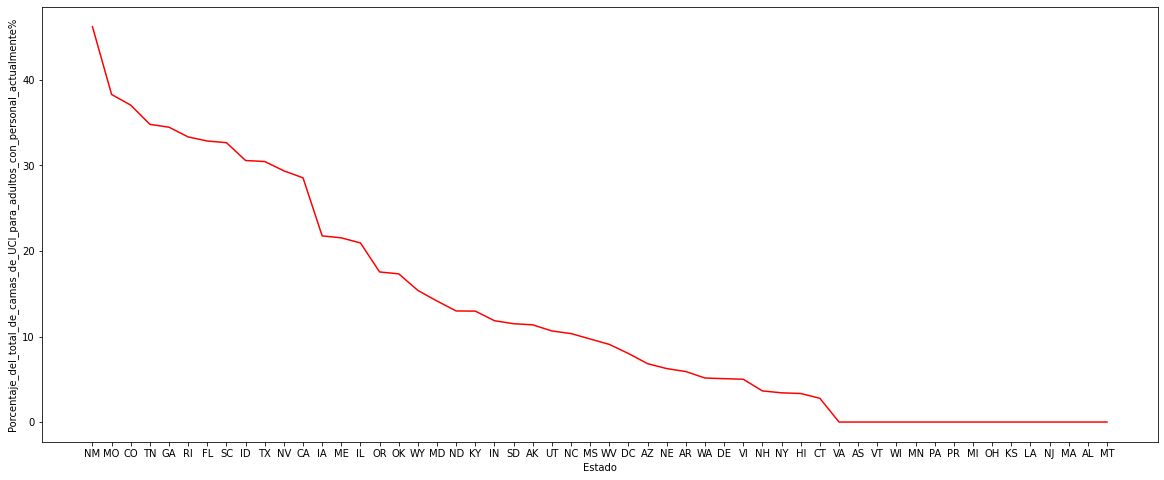

In [153]:
plt.figure(figsize = (20,8))
sns.lineplot(x ='Estado', y = 'Porcentaje_del_total_de_camas_de_UCI_para_adultos_con_personal_actualmente%', data=porcentaje_uci_2, color='red')

plt.savefig("rankin_estados_uci.jpg", bbox_inches='tight')


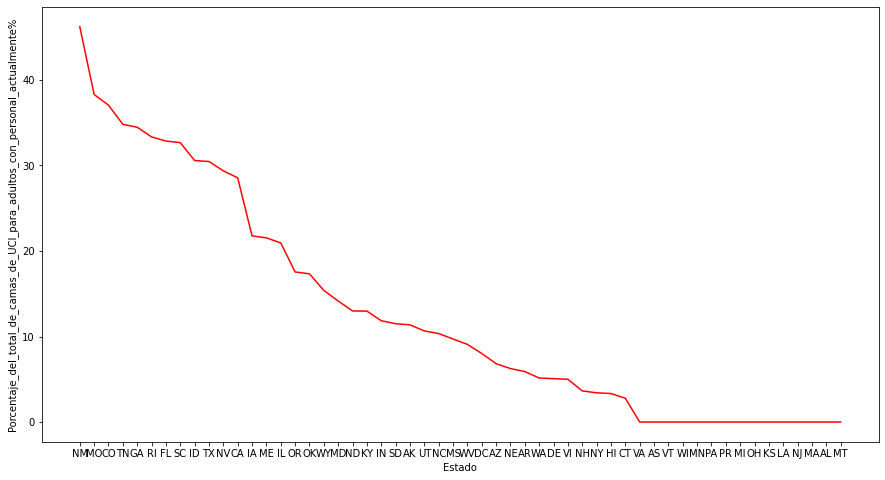

In [126]:
fig, ax = plt.subplots()
sns.lineplot(x='Estado', y='Porcentaje_del_total_de_camas_de_UCI_para_adultos_con_personal_actualmente%', data=porcentaje_uci_2, ax=ax, color='red')
plt.gcf().set_size_inches(15, 8)

In [127]:
ax = sns.barplot(x="Estado", y="deaths_covid", data=data_2021)
plt.gcf().set_size_inches(15, 8)

NameError: name 'data_2021' is not defined

### 6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [128]:
#Número de pacientes con COVID-19 presunto o confirmado que fallecieron el día calendario anterior en el hospital, el servicio de urgencias o el lugar de desbordamiento
'deaths_covid'

'deaths_covid'

In [129]:
death = pd.DataFrame()

fecha_inicio = "2021-01-01"
fecha_fin = "2021-12-31"
death['Fecha'] = data['date']
death['Estado'] = data['state']
death['deaths_covid'] = data['deaths_covid']

In [130]:
data_2021 = death

In [131]:
data_2021 = death[(death['Fecha'] >= fecha_inicio) & (death['Fecha'] <= fecha_fin)]

In [132]:
# Pasando a INT  deaths_covid
data_2021['deaths_covid'] = data_2021['deaths_covid'].astype(int)

C:\Users\Manuel Revelo\AppData\Local\Temp\ipykernel_16656\830328460.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
data_2021_2 = data_2021.groupby(by="Estado").first()
data_2021_2

,Fecha,deaths_covid
Estado,,
AK,2021-08-19,5
AL,2021-05-12,5
AR,2021-04-02,0
AS,2021-12-29,0
AZ,2021-11-30,132
CA,2021-12-05,51
CO,2021-12-17,19
CT,2021-12-04,4
DC,2021-12-21,2


In [155]:
data_2021_2 = data_2021.groupby(by="Estado").first()
data_2021_2

,Fecha,deaths_covid
Estado,,
AK,2021-08-19,5
AL,2021-05-12,5
AR,2021-04-02,0
AS,2021-12-29,0
AZ,2021-11-30,132
CA,2021-12-05,51
CO,2021-12-17,19
CT,2021-12-04,4
DC,2021-12-21,2


In [156]:
data_2021_2

,Fecha,deaths_covid
Estado,,
AK,2021-08-19,5
AL,2021-05-12,5
AR,2021-04-02,0
AS,2021-12-29,0
AZ,2021-11-30,132
CA,2021-12-05,51
CO,2021-12-17,19
CT,2021-12-04,4
DC,2021-12-21,2


In [137]:
data_2021.groupby('Estado')['deaths_covid'].sum().sort_values(ascending=False)

Estado
CA    35108
TX    32889
FL    26004
NY    17620
AZ    16250
PA    13363
GA    12338
OH    12023
NC    10922
TN     9439
MI     9332
IL     7500
KY     7252
NJ     6889
VA     6479
SC     6434
AL     6390
MO     6285
IN     5846
PR     4516
NV     4412
OK     4180
MD     4025
WA     3847
WI     3665
MS     3664
MA     3631
LA     3624
AR     3582
CO     2835
CT     2725
WV     2507
KS     2469
OR     2412
MN     2377
NM     1898
IA     1876
ID     1529
NE     1220
MT     1172
RI      914
ME      704
UT      618
AK      614
SD      572
DE      562
DC      532
NH      520
WY      496
HI      445
ND      334
VT      131
VI       44
AS        0
Name: deaths_covid, dtype: int32

In [138]:
data_2021.tail(20)

,Fecha,Estado,deaths_covid
46546,2021-03-01,NY,73
46548,2021-03-02,UT,1
46554,2021-02-18,MO,13
46563,2021-03-03,DE,1
46568,2021-01-07,MS,36
46574,2021-02-25,NY,103
46575,2021-03-06,OH,10
46578,2021-02-02,MA,29
46582,2021-01-13,NC,58
46584,2021-01-12,NE,9


In [139]:
data_2021['deaths_covid'].sum()

317015

In [140]:
data_2021_2.reset_index(inplace=True)

In [141]:
data_2021

,Fecha,Estado,deaths_covid
92,2021-12-29,AS,0
93,2021-12-29,UT,2
94,2021-12-26,AS,0
95,2021-12-21,DC,2
96,2021-12-20,MT,7
...,...,...,...
46597,2021-02-19,MI,13
46599,2021-02-11,AL,34
46600,2021-02-03,NH,1
46606,2021-02-20,NV,11


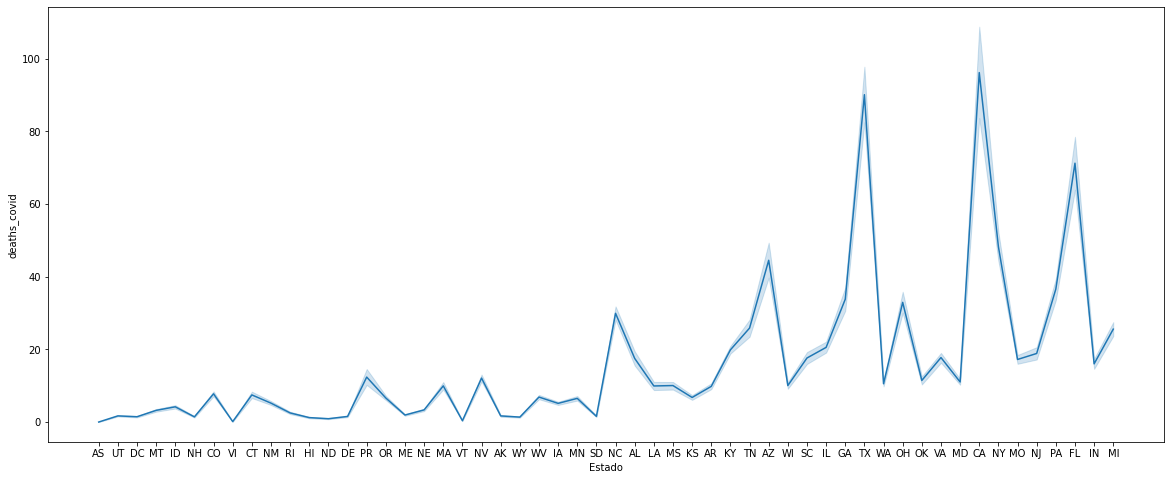

In [157]:
plt.figure(figsize = (20,8))
sns.lineplot(x ='Estado', y = 'deaths_covid', data=data_2021)
plt.savefig("muertes_estados_rankin.jpg", bbox_inches='tight')

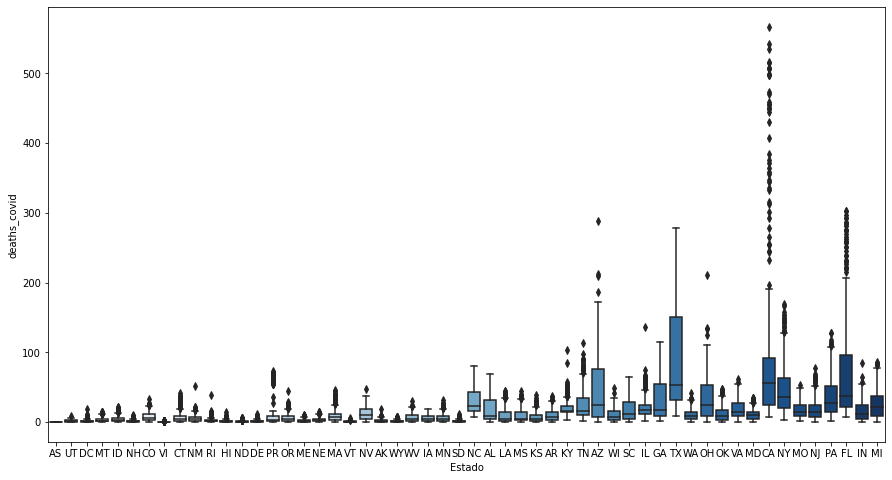

In [158]:
sns.boxplot( x=data_2021["Estado"], y=data_2021["deaths_covid"], palette="Blues")
plt.gcf().set_size_inches(15, 8)
plt.savefig("muertes_estados_rankin2.jpg", bbox_inches='tight')
plt.show()

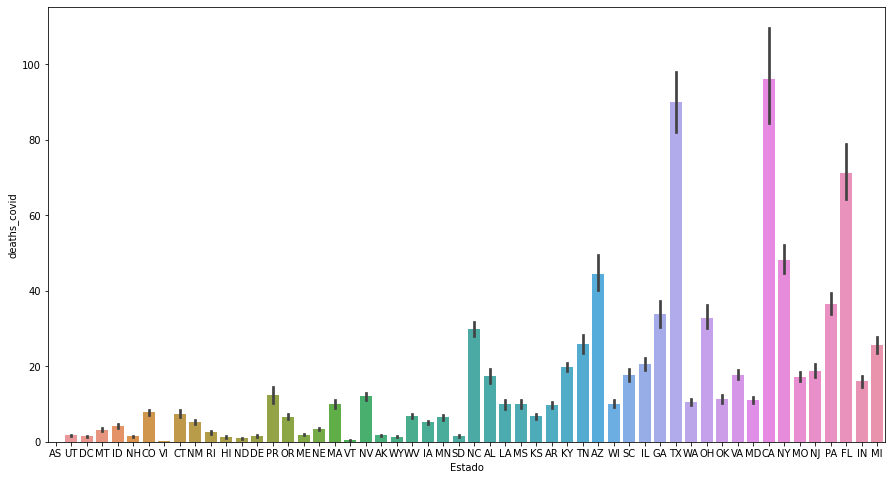

In [159]:
ax = sns.barplot(x="Estado", y="deaths_covid", data=data_2021)
plt.gcf().set_size_inches(15, 8)
plt.savefig("muertes_estados_rankin3.jpg", bbox_inches='tight')


#### 7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

In [181]:
relacion = pd.DataFrame()

fecha_inicio = "2021-01-01"
fecha_fin = "2021-12-31"
relacion['Fecha'] = data['date']
relacion['Estado'] = data['state']
relacion['deaths_covid'] = data['deaths_covid']
relacion['hospitales_que_reportaron_falta_de_personal_medico'] = data['critical_staffing_shortage_today_yes']


In [182]:
relacion['deaths_covid'].sum()

681491.0

In [183]:
relacion['hospitales_que_reportaron_falta_de_personal_medico'].sum()

541658

In [172]:
# Hospitales que reportaron falta de personal agrupado por estado
relacion.groupby('Estado')['hospitales_que_reportaron_falta_de_personal_medico'].sum().sort_values(ascending=False)

Estado
CA    53570
TX    50524
LA    26288
GA    25070
OK    20956
SC    19311
MO    18189
WI    17590
PA    16916
AZ    16776
AL    16594
IN    13525
KS    13504
TN    12784
AR    12707
VA    12501
MI    12483
FL    11864
OH    11813
KY    10785
MN    10747
NE    10335
IL     9927
NM     9846
WV     9153
MS     8507
CO     8395
WA     7730
ND     7488
NJ     6508
MT     5895
MA     5842
NC     5510
NY     5268
MD     3200
VT     3050
WY     2829
NH     2790
OR     2710
IA     2531
RI     2478
ID     2477
ME     1981
SD     1778
HI     1725
PR     1590
NV     1495
AK     1491
CT     1415
UT     1105
DE     1017
VI      856
DC      236
AS        3
Name: hospitales_que_reportaron_falta_de_personal_medico, dtype: int64

In [198]:
rela2=relacion.groupby('Estado')['deaths_covid'].sum().sort_values(ascending=False)

Estado
NY    77202.0
CA    67920.0
TX    63615.0
FL    48557.0
PA    28325.0
AZ    26725.0
MI    22774.0
GA    20464.0
OH    19936.0
NC    19872.0
IL    19721.0
TN    17528.0
NJ    16918.0
OR    15094.0
IN    14448.0
KY    13836.0
MO    13143.0
AL    12205.0
VA    12202.0
SC    11999.0
WI    11069.0
MA     9494.0
MS     9244.0
MD     8384.0
LA     8338.0
OK     8067.0
NV     7914.0
PR     7620.0
WA     7583.0
AR     6851.0
CT     5619.0
IA     5083.0
MN     5040.0
KS     4997.0
CO     4953.0
NM     3736.0
WV     3688.0
NE     3070.0
MT     2619.0
ID     2522.0
DC     1862.0
RI     1741.0
SD     1280.0
DE     1178.0
ND     1163.0
UT     1156.0
ME     1043.0
AK      980.0
HI      838.0
NH      821.0
WY      771.0
VT      228.0
VI       55.0
AS        0.0
Name: deaths_covid, dtype: float64

In [193]:
rela3 = relacion.groupby('Estado').sum([['deaths_covid'],['hospitales_que_reportaron_falta_de_personal_medico']])#.sort_values(ascending=False)


In [191]:
rela2

Estado
NY    77202.0
CA    67920.0
TX    63615.0
FL    48557.0
PA    28325.0
AZ    26725.0
MI    22774.0
GA    20464.0
OH    19936.0
NC    19872.0
IL    19721.0
TN    17528.0
NJ    16918.0
OR    15094.0
IN    14448.0
KY    13836.0
MO    13143.0
AL    12205.0
VA    12202.0
SC    11999.0
WI    11069.0
MA     9494.0
MS     9244.0
MD     8384.0
LA     8338.0
OK     8067.0
NV     7914.0
PR     7620.0
WA     7583.0
AR     6851.0
CT     5619.0
IA     5083.0
MN     5040.0
KS     4997.0
CO     4953.0
NM     3736.0
WV     3688.0
NE     3070.0
MT     2619.0
ID     2522.0
DC     1862.0
RI     1741.0
SD     1280.0
DE     1178.0
ND     1163.0
UT     1156.0
ME     1043.0
AK      980.0
HI      838.0
NH      821.0
WY      771.0
VT      228.0
VI       55.0
AS        0.0
Name: deaths_covid, dtype: float64

In [161]:
rela2.to_csv('muertes-personal.csv')

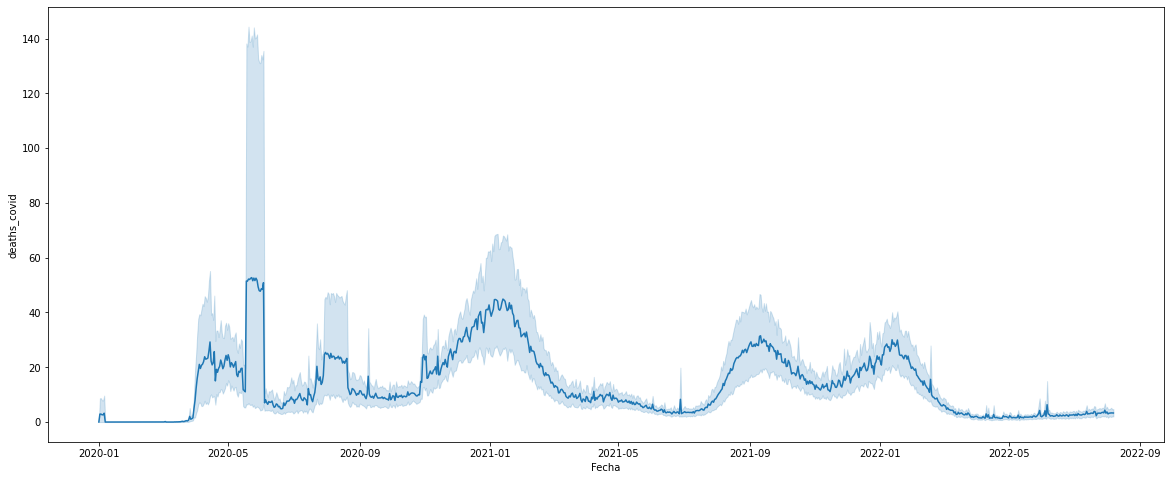

In [197]:
#.sort_values(by='total_patients_hospitalized_confirmed_covid', ascending=False).head()
plt.figure(figsize = (20,8))
sns.lineplot(x = 'Fecha', y = 'deaths_covid',data = relacion)

plt.savefig("deaths_covid.jpg", bbox_inches='tight')

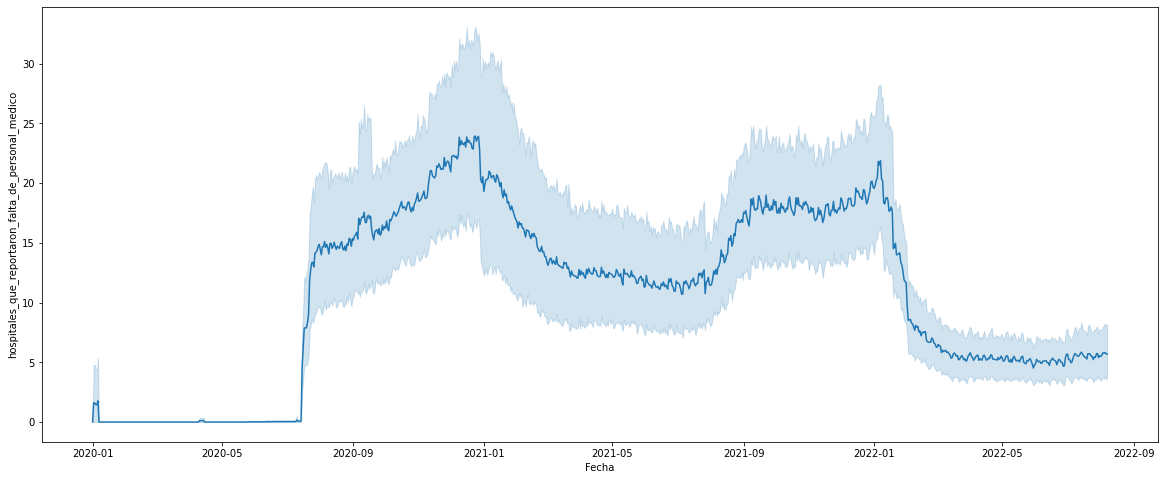

In [150]:
plt.figure(figsize = (20,8))
sns.lineplot(x = 'Fecha', y = 'hospitales_que_reportaron_falta_de_personal_medico',data = relacion)

plt.savefig("falta_de_personal.jpg", bbox_inches='tight')

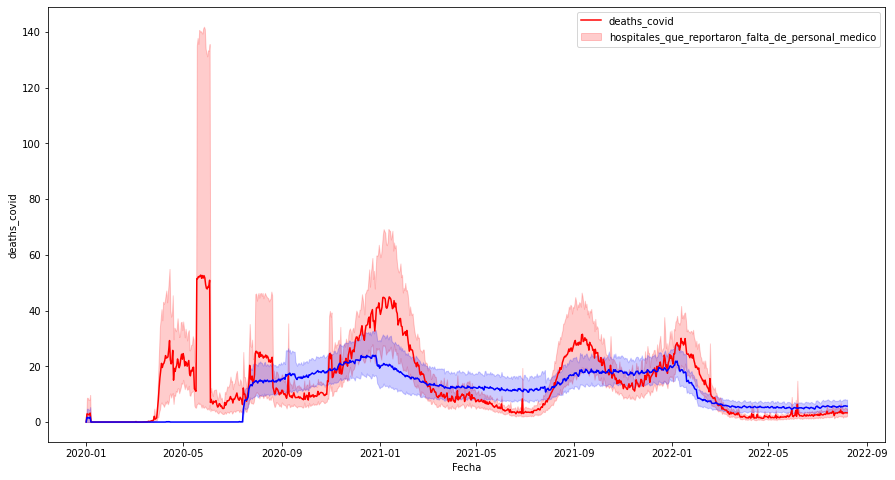

In [151]:
import seaborn as sns
s1 = sns.lineplot(x = 'Fecha', y = 'deaths_covid', data = relacion, color = 'red')

s2 = sns.lineplot(x = 'Fecha', y = 'hospitales_que_reportaron_falta_de_personal_medico', data = relacion, color = 'blue')

plt.legend(labels = ['deaths_covid','hospitales_que_reportaron_falta_de_personal_medico'])
plt.gcf().set_size_inches(15, 8)

plt.savefig("relacion_muertes_falta_de_personal.jpg", bbox_inches='tight')

In [ ]:
pacientes_pedriaticos = data_2020.groupby('Estado').sum([['total_pacientes_pediatricos_hospitalizados_confirmados_covid'],['todas_las_camas_de_hospitalización_pediátrica_ocupadas'], ['pacientes_pediátricos_de_la_UCI_con_personal_confirmado_covid'], ['Ocupación_de_camas_en_la_UCI_pediátrica_conpersonal']])


#### 8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

El peor mes de la pandemia fue el 21-01 que fue el mes que mas hubo Muertes por covid. Y tambien fue donde hubo reporte de falta de personal Medico

#### 9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

Con respecto a los recursos hospilatarios, recomendaria una mayor inversión en temas de recursos, para futuros problemas como lo que paso con pandemia, recursos como camas, respiradores, etc.
Se recomienda tambien contar con una mayor de personal capacitado, para tiempos de pandemía, que fueron bastantes escasos en comparación a como a sucedido la pandemia por COVID